In [73]:
# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import os
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow_datasets as tfds

In [ ]:
'''
build_plainnet() 함수 PlainNet-50과 PlainNet-34 input_size = (224, 224, 3)
build_resnet(input_shape=(224,224,3), is_50 = False)
build_resnet(input_shape=(224,224,3), is_50 = True)

둘 다 batch normalization이 있어야함.
-----------------------------------------------------------------------------
ResNet-34, ResNet-50 모델 구현이 정상적으로 진행되었는가?

블록함수 구현이 제대로 진행되었으며 구현한 모델의 summary가 예상된 형태로 출력되었다.
-----------------------------------------------------------------------------
구현한 ResNet 모델을 활용하여 Image Classification 모델 훈련이 가능한가?

tensorflow-datasets에서 제공하는 cats_vs_dogs 데이터셋으로 학습 진행 시 loss가 감소하는 것이 확인되었다.
-----------------------------------------------------------------------------
Ablation Study 결과가 바른 포맷으로 제출되었는가?

ResNet-34, ResNet-50 각각 plain모델과 residual모델을 동일한 epoch만큼 학습시켰을 때의 validation accuracy 기준으로 Ablation Study 결과표가 작성되었다.

'''

'''
일단 데이터 불러오고, <<< 0
데이터 로드하고 <<< 0
데이터 shape 어떻게 생겼는지 <<< 0
그 다음에 plainnet() 34 0
resnet() 34 0 

plainnet() 50 0
resnet() 50 0
-----------------------------------------------------------------------------
(Optimizer): SGD 0
(Mini-batch size): 256
학습률 (Learning Rate): 0.1로 시작하여, 에러가 정체될 때(plateaus) 10으로 나누어 감소시킴 0
(Weight Decay): 0.0001 0 
(Momentum): 0.9 0 

-----------------------------------------------------------------------------

cats_vs_dogs 불러올때, 반드시 코드로 불러와야 하나?
아니어도 될거같은데
-----------------------------------------------------------------------------

훈련이 진행됨에 따라 러닝커브 / table 제작

기울기 소실이 해결되었는지

'''
pass

In [75]:
# configs
class Config_renet:
    model_type   = "Resnet34"          # "Resnet34" or "Resnet50"
    batch_size   = 16
    is_50        = True                # or False
    epochs       = 5
    lr           = 2e-5
    device       = "cuda" if torch.cuda.is_available() else "cpu"

In [76]:
# cats_vs_dogs 불러오기 // datasets = tfds.load("cats_vs_dogs", split=split, as_supervised=True) 오류로 
# https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip 에서 다운

path = 'kagglecatsanddogs_5340/PetImages'

transform = transforms.Compose([
    transforms.Resize((224, 224)), # 모델의 인풋사이즈가 3,224,224 / 데이터 사이즈가 제각각
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])




In [77]:
dataset = datasets.ImageFolder(root=path, transform=transform)

In [78]:
train_size = int(0.8 * len(dataset))
test_size  = len(dataset) - train_size
trainset, testset = random_split(dataset, [train_size, test_size])


In [79]:
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader  = DataLoader(testset,  batch_size=32, shuffle=False)

In [80]:
image, label = trainset[0]

print(f"Image shape: {image.shape}")
print(f"Label: {label}")
print(f"Number of train set: ", len(trainset))

Image shape: torch.Size([3, 224, 224])
Label: 0
Number of train set:  19998


In [81]:
train_size = torch.tensor(len(trainset))
test_size = torch.tensor(len(testset))

print(f"Train dataset size: {train_size} (Shape: {train_size.shape})")
print(f"Test dataset size: {test_size} (Shape: {test_size.shape})")

Train dataset size: 19998 (Shape: torch.Size([]))
Test dataset size: 5000 (Shape: torch.Size([]))


In [82]:
def imshow(img):
    #img = img / 2 + 0.5
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

class_names = ['cat', 'dog']

In [83]:
def show_multiple_images(dataloader, class_names, n_images=25):
    dataiter = iter(dataloader)
    images, labels = next(dataiter)

    fig, axes = plt.subplots(5, 5, figsize=(7, 7))
    axes = axes.flatten()

    for i in range(n_images):
        ax = axes[i]
        img = imshow(images[i])
        ax.imshow(img)
        ax.set_title(class_names[labels[i]], fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.343704].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7754089..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.5071026].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781574..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].
Clippi

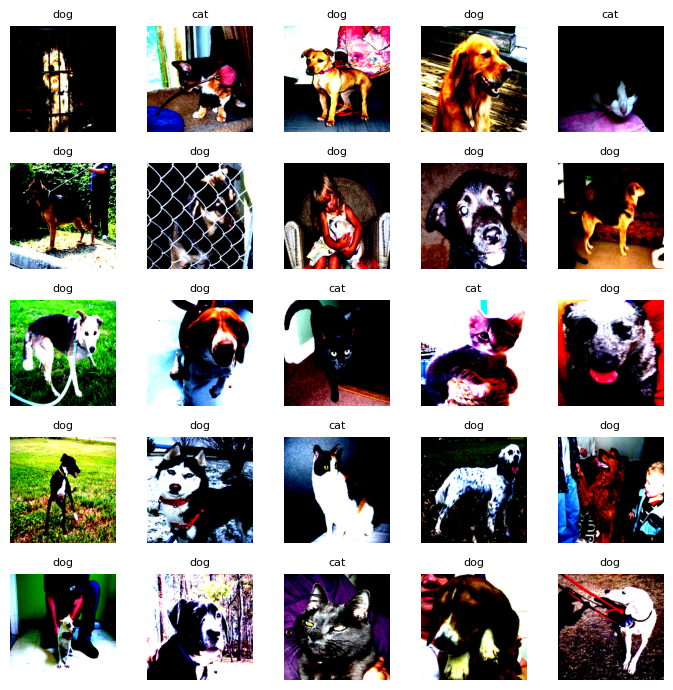

In [84]:
show_multiple_images(trainloader , class_names )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.843908..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.4134207].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..1.8550389].
Clip

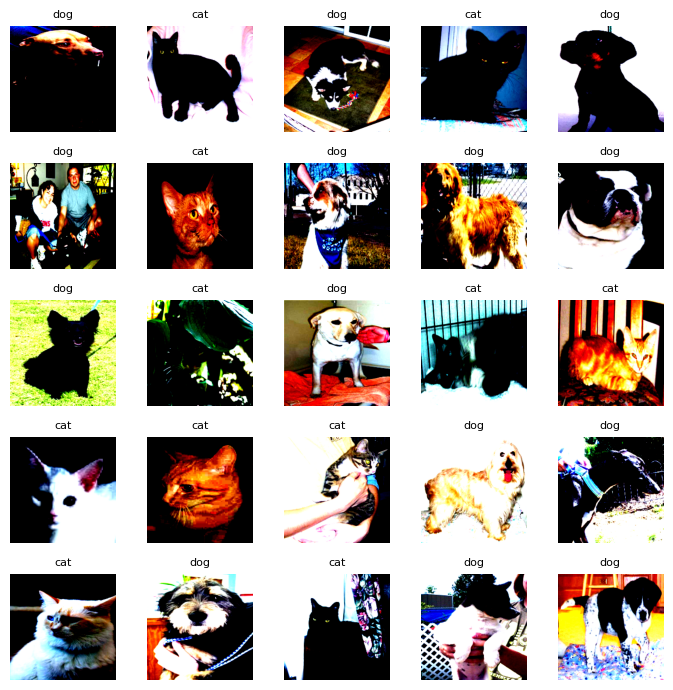

In [85]:
show_multiple_images(testloader, class_names)

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

# 아니 근데 이 반복문은 도대체 왜 있는거지
# 노드 함수 변형
def build_plainnet(input_layer, num_blocks=3, channel=64):
    """
    PlainNet 블록 생성 함수 
    
    Args:
        input_layer: 입력 텐서
        num_blocks: 블록 개수 (conv2_x=3, conv3_x=4, conv4_x=6, conv5_x=3)
        channel: 출력 채널 수
    
    Returns:
        nn.Sequential: PlainBlock들로 구성된 레이어
    """
    x = input_layer
    layer = []
    in_channels = x.size(1)
    
    for block_idx in range(num_blocks):
        # 첫 번째 conv
        layer.append(
            nn.Conv2d(
                in_channels=in_channels,
                out_channels=channel,
                kernel_size=3,
                stride=1,
                padding=1,
                bias=False
            )
        )
        layer.append(nn.BatchNorm2d(channel))
        layer.append(nn.ReLU(inplace=True))
        
        # 두 번째 conv
        layer.append(
            nn.Conv2d(
                in_channels=channel,
                out_channels=channel,
                kernel_size=3,
                stride=1,
                padding=1,
                bias=False
            )
        )
        layer.append(nn.BatchNorm2d(channel))
        layer.append(nn.ReLU(inplace=True))
        
        in_channels = channel
    
    block = nn.Sequential(*layer)
    return block







In [2]:
class PlainNet34(nn.Module):
    
    def __init__(self, num_blocks_list=[3, 4, 6, 3], channel_list=[64, 128, 256, 512], num_classes=2):
        super(PlainNet34, self).__init__()
        assert len(num_blocks_list) == len(channel_list), "num_blocks_list와 channel_list의 길이가 일치해야 합니다."
        
        # conv1: 7x7 conv + maxpool
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        # conv2_x ~ conv5_x
        layers = []
        in_channels = 64
        
        for block_idx, (num_blocks, out_channels) in enumerate(zip(num_blocks_list, channel_list)):
            # 첫 번째 stage는 stride=1, 나머지는 stride=2로 다운샘플링
            if block_idx == 0:
                layers.append(self._make_plainnet_stage(in_channels, out_channels, num_blocks, stride=1))
            else:
                layers.append(self._make_plainnet_stage(in_channels, out_channels, num_blocks, stride=2))
            in_channels = out_channels
        
        self.conv2_5 = nn.Sequential(*layers)
        
        # Classifier
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, num_classes)
        )
        
        # Weight 초기화
        self._initialize_weights()
    
    def _make_plainnet_stage(self, in_channels, out_channels, num_blocks, stride):
        """PlainNet stage 생성"""
        layers = []
        
        # 첫 번째 블록 
        layers.append(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        )
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU(inplace=True))
        
        layers.append(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        )
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU(inplace=True))
        
        # 나머지 블록들 (stride=1)
        for _ in range(1, num_blocks):
            layers.append(
                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
            )
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
            
            layers.append(
                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
            )
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        # 가중치 초기화
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = self.conv1(x)              # 224x224 -> 56x56
        x = self.conv2_5(x)  # 56x56 -> 7x7
        x = self.head(x)         # 7x7 -> 1x1 -> num_classes
        return x




In [ ]:
'''
build_plainnet() 함수 PlainNet-50과 PlainNet-34 input_size = (224, 224, 3)
build_resnet(input_shape=(224,224,3), is_50 = False)
build_resnet(input_shape=(224,224,3), is_50 = True)

둘 다 batch normalization, 가중치 초기화가 있어야함. 왜? 논문에 있으니까

Resnet 과 plainnet 은 스킵커넥션 빼고 다 똑같아야함.

'''

pass


In [112]:
# 테스트 코드
if __name__ == "__main__":
    # PlainNet-34  (노드 스타일)
    plainnet_34 = PlainNet34(
        num_blocks_list=[3, 4, 6, 3],
        channel_list=[64, 128, 256, 512],
        num_classes=2
    )
    
    dummy_input = torch.zeros(1, 3, 224, 224)
    
    # 파라미터 수 계산
    total_params = sum(p.numel() for p in plainnet_34.parameters())
    trainable_params = sum(p.numel() for p in plainnet_34.parameters() if p.requires_grad)
    print(f"\nTotal parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    print("\n" + "=" * 60)
    print("PlainNet-34 Configuration:")
    print("=" * 60)
    print(f"num_blocks_list = [3, 4, 6, 3]  # conv2_x ~ conv5_x")
    print(f"channel_list = [64, 128, 256, 512]")
    print(f"num_classes = 2  # 개고양이")


    model_1 = plainnet_34
    print(model_1)

    



Total parameters: 21,111,874
Trainable parameters: 21,111,874

PlainNet-34 Configuration:
num_blocks_list = [3, 4, 6, 3]  # conv2_x ~ conv5_x
channel_list = [64, 128, 256, 512]
num_classes = 2  # 개고양이
PlainNet34(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2_5): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      

In [104]:
import time

# PlainNet-34 모델 

EPOCH = 40 

# 학습 시작
current_time = time.time()

# Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# PlainNet-34 모델 생성 (개/고양이 분류)
plainnet_34 = PlainNet34(
    num_blocks_list=[3, 4, 6, 3],
    channel_list=[64, 128, 256, 512],
    num_classes=2  # 개, 고양이
)
plainnet_34.to(device)

# 모든 파라미터 학습 가능하도록 설정
for param in plainnet_34.parameters():
    param.requires_grad = True

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(plainnet_34.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# 학습 기록 저장
plainnet_34_train_losses = []
plainnet_34_train_accuracy = []
plainnet_34_val_accuracy = []

print("=" * 60)
print("시작")
print("=" * 60)

for epoch in range(EPOCH):
    # Training Phase
    plainnet_34.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = plainnet_34(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print progress every 100 batches
        if i % 100 == 99:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # Epoch statistics
    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    plainnet_34_train_losses.append(train_loss)
    plainnet_34_train_accuracy.append(train_acc)

    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation Phase
    plainnet_34.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = plainnet_34(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    plainnet_34_val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}: Validation Accuracy: {val_acc:.2f}%")
    print("-" * 60)

print("=" * 60)
print("Finished Training")
print(f"Total training time: {time.time() - current_time:.2f} seconds")
print("=" * 60)

# 최종 결과 요약
print("\nTraining Summary:")
print(f"Best Train Accuracy: {max(plainnet_34_train_accuracy):.2f}%")
print(f"Best Validation Accuracy: {max(plainnet_34_val_accuracy):.2f}%")
print(f"Final Train Accuracy: {plainnet_34_train_accuracy[-1]:.2f}%")
print(f"Final Validation Accuracy: {plainnet_34_val_accuracy[-1]:.2f}%")



torch.save(plainnet_34.state_dict(), 'plainnet34_catdog.pth')
print("\nModel saved as 'plainnet34_catdog.pth'")



Using device: cuda
시작
[1,   100] loss: 0.699
[1,   200] loss: 0.700
[1,   300] loss: 0.697
[1,   400] loss: 0.693
[1,   500] loss: 0.684
[1,   600] loss: 0.688
Epoch 1: Train Loss: 0.0278, Train Accuracy: 53.03%
Epoch 1: Validation Accuracy: 52.24%
------------------------------------------------------------
[2,   100] loss: 0.686
[2,   200] loss: 0.679
[2,   300] loss: 0.679
[2,   400] loss: 0.672
[2,   500] loss: 0.675
[2,   600] loss: 0.668
Epoch 2: Train Loss: 0.0266, Train Accuracy: 57.84%
Epoch 2: Validation Accuracy: 60.96%
------------------------------------------------------------
[3,   100] loss: 0.657
[3,   200] loss: 0.661
[3,   300] loss: 0.665
[3,   400] loss: 0.655
[3,   500] loss: 0.647
[3,   600] loss: 0.644
Epoch 3: Train Loss: 0.0260, Train Accuracy: 61.36%
Epoch 3: Validation Accuracy: 62.00%
------------------------------------------------------------
[4,   100] loss: 0.638
[4,   200] loss: 0.636
[4,   300] loss: 0.630
[4,   400] loss: 0.630
[4,   500] loss: 0.617

## 트러블 슈팅 

**이미지 파일 자체가 깨져 있어서 error 발생.**
**따라서 이미지 파일이 깨져 있는 강아지,고양이 폴더에서 각각 1개씩 삭제**
**Train dataset size: 19998 (Shape: torch.Size([])) 기존에는 20000**

## [삭제] 손상된 이미지: PetImages/Cat/666.jpg
## /usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
##  warnings.warn(str(msg))
## [삭제] 손상된 이미지: PetImages/Dog/11702.jpg


In [133]:
# 
'''
import os
from PIL import Image, UnidentifiedImageError

def remove_broken_images(root_dir):
    """
    주어진 root_dir 내부의 모든 이미지 파일을 검사하여
    열리지 않는(손상된) 이미지를 자동 삭제
    """
    count_removed = 0

    for root, _, files in os.walk(root_dir):
        for fname in files:
            path = os.path.join(root, fname)

            # 이미지 확장자만 검사 (선택)
            ext = fname.lower().split(".")[-1]
            if ext not in ["jpg"]:
                continue

            try:
                # 이미지 파일이 열리는지 테스트
                with Image.open(path) as img:
                    img.verify()   # 파일의 무결성 확인
            except (UnidentifiedImageError, OSError):
                print(f"[삭제] 손상된 이미지: {path}")
                os.remove(path)
                count_removed += 1

    print(f"\n총 삭제된 이미지 수: {count_removed}")

# 실행
root_dir = "kagglecatsanddogs_5340\PetImages"   # Cat / Dog 폴더가 있는 상위 폴더
remove_broken_images(root_dir)
'''
pass

<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
C:\Users\C\AppData\Local\Temp\ipykernel_21552\3559035797.py:34: SyntaxWarning: invalid escape sequence '\P'
  root_dir = "kagglecatsanddogs_5340\PetImages"   # Cat / Dog 폴더가 있는 상위 폴더


Training curves saved as 'plainnet34_training_curves.png'


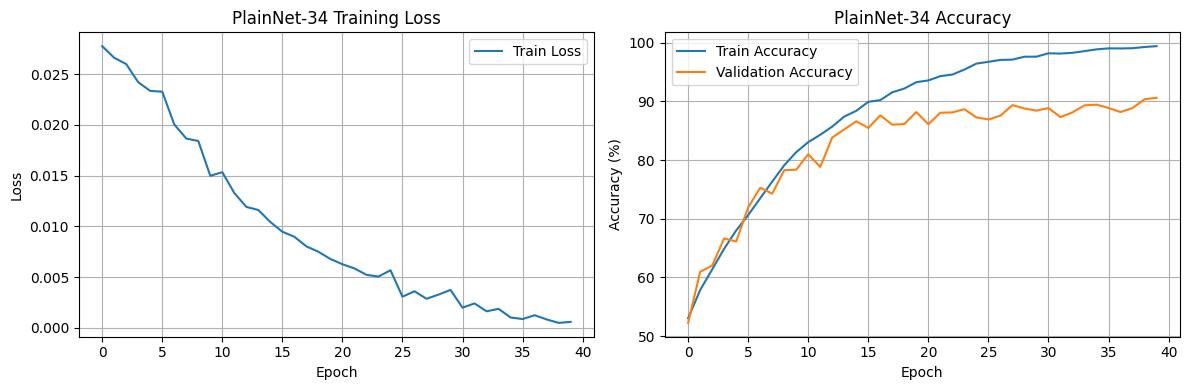

In [134]:
import matplotlib.pyplot as plt
    
plt.figure(figsize=(12, 4))
    
    # Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(plainnet_34_train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('PlainNet-34 Training Loss')
plt.legend()
plt.grid(True)
    
    # Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(plainnet_34_train_accuracy, label='Train Accuracy')
plt.plot(plainnet_34_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('PlainNet-34 Accuracy')
plt.legend()
plt.grid(True)
    
plt.tight_layout()
plt.savefig('plainnet34_training_curves.png')
print("Training curves saved as 'plainnet34_training_curves.png'")
plt.show()

In [4]:
class ResidualBlock(nn.Module):
    """ResNet의 기본 블록 (skip connection 포함)"""
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Shortcut connection 
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Skip connection
        out += self.shortcut(identity)
        out = self.relu(out)
        
        return out


class ResNet34(nn.Module):
    """ResNet-34 (VGG 스타일 구현)"""
    
    def __init__(self, num_blocks_list=[3, 4, 6, 3], channel_list=[64, 128, 256, 512], num_classes=2):
        super(ResNet34, self).__init__()
        assert len(num_blocks_list) == len(channel_list), "num_blocks_list와 channel_list의 길이가 일치해야 합니다."
        
        # conv1: 7x7 conv + maxpool
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        # conv2_x ~ conv5_x
        layers = []
        in_channels = 64
        
        for block_idx, (num_blocks, out_channels) in enumerate(zip(num_blocks_list, channel_list)):
            # 첫 번째 stage는 stride=1, 나머지는 stride=2로 다운샘플링
            if block_idx == 0:
                layers.append(self._make_resnet_stage(in_channels, out_channels, num_blocks, stride=1))
            else:
                layers.append(self._make_resnet_stage(in_channels, out_channels, num_blocks, stride=2))
            in_channels = out_channels
        
        self.feature_extractor = nn.Sequential(*layers)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, num_classes)
        )
        
        # Weight 초기화
        self._initialize_weights()
    
    def _make_resnet_stage(self, in_channels, out_channels, num_blocks, stride):
        """ResNet stage 생성"""
        layers = []
        
        # 첫 번째 블록 (다운샘플링 가능)
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        
        # 나머지 블록들 (stride=1)
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        """가중치 초기화 (He initialization)"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = self.conv1(x)              # 224x224 -> 56x56
        x = self.feature_extractor(x)  # 56x56 -> 7x7
        x = self.classifier(x)         # 7x7 -> 1x1 -> num_classes
        return x




In [ ]:
# 테스트 코드
if __name__ == "__main__":
    # ResNet-34 생성 (노드 코드변경)
    resnet_34 = ResNet34(
        num_blocks_list=[3, 4, 6, 3],
        channel_list=[64, 128, 256, 512],
        num_classes=2
    )
    
    print("=" * 60)
    print("ResNet-34 Model Architecture (VGG Style)")
    print("=" * 60)
    print(resnet_34)
    print("\n" + "=" * 60)
    
    # 더미 입력으로 테스트
    dummy_input = torch.randn(1, 3, 224, 224)
    
    print("\nLayer-wise Output Shapes:")
    print("=" * 60)
    
    x = dummy_input
    print(f"Input:         {x.shape}")
    
    # conv1
    x = resnet_34.conv1(x)
    print(f"After conv1:   {x.shape}")
    
    # feature extractor (conv2_x ~ conv5_x)
    for idx, layer in enumerate(resnet_34.feature_extractor):
        x = layer(x)
        stage_name = ['conv2_x', 'conv3_x', 'conv4_x', 'conv5_x'][idx]
        print(f"After {stage_name}: {x.shape}")
    
    # classifier
    x = resnet_34.classifier(x)
    print(f"Final output:  {x.shape}")
    
    print("=" * 60)
    
    # 전체 forward pass
    output = resnet_34(dummy_input)
    print(f"\nFinal model output shape: {output.shape}")
    
    # 파라미터 수 계산
    total_params = sum(p.numel() for p in resnet_34.parameters())
    trainable_params = sum(p.numel() for p in resnet_34.parameters() if p.requires_grad)
    print(f"\nTotal parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    
    print("\n" + "=" * 60)
    print("ResNet-34 Configuration:")
    print("=" * 60)
    print(f"num_blocks_list = [3, 4, 6, 3]  # conv2_x ~ conv5_x")
    print(f"channel_list = [64, 128, 256, 512]")
    print(f"num_classes = 2  # 개고양이")
    
    print("\n" + "=" * 60)
    print("PlainNet-34 vs ResNet-34 차이점:")
    print("=" * 60)
    print("PlainNet-34: Skip connection 없음")
    print("             output = F(x)")
    print("\nResNet-34:   Skip connection 있음")
    print("             output = F(x) + x")

ResNet-34 Model Architecture (VGG Style)
ResNet34(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [137]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time

# ResNet-34 모델 import (위에서 정의한 ResNet34 클래스 사용)
# from resnet34 import ResNet34

EPOCH = 40  # 에폭 수 설정

# 학습 시작
current_time = time.time()

# Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ResNet-34 모델 생성 (개/고양이 분류)
resnet_34 = ResNet34(
    num_blocks_list=[3, 4, 6, 3],
    channel_list=[64, 128, 256, 512],
    num_classes=2  # 개, 고양이
)
resnet_34.to(device)

# 모든 파라미터 학습 가능하도록 설정
for param in resnet_34.parameters():
    param.requires_grad = True

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet_34.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# 학습 기록 저장
resnet_34_train_losses = []
resnet_34_train_accuracy = []
resnet_34_val_accuracy = []

print("=" * 60)
print("Starting ResNet-34 Training")
print("=" * 60)

for epoch in range(EPOCH):
    # Training Phase
    resnet_34.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = resnet_34(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print progress every 100 batches
        if i % 100 == 99:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # Epoch statistics
    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    resnet_34_train_losses.append(train_loss)
    resnet_34_train_accuracy.append(train_acc)

    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation Phase
    resnet_34.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet_34(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    resnet_34_val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}: Validation Accuracy: {val_acc:.2f}%")
    print("-" * 60)

print("=" * 60)
print("Finished Training")
print(f"Total training time: {time.time() - current_time:.2f} seconds")
print("=" * 60)

# 최종 결과 요약
print("\nTraining Summary:")
print(f"Best Train Accuracy: {max(resnet_34_train_accuracy):.2f}%")
print(f"Best Validation Accuracy: {max(resnet_34_val_accuracy):.2f}%")
print(f"Final Train Accuracy: {resnet_34_train_accuracy[-1]:.2f}%")
print(f"Final Validation Accuracy: {resnet_34_val_accuracy[-1]:.2f}%")

# 모델 저장 (선택사항)
torch.save(resnet_34.state_dict(), 'resnet34_catdog.pth')
print("\nModel saved as 'resnet34_catdog.pth'")




Using device: cuda
Starting ResNet-34 Training


KeyboardInterrupt: 

Training curves saved as 'resnet34_training_curves.png'


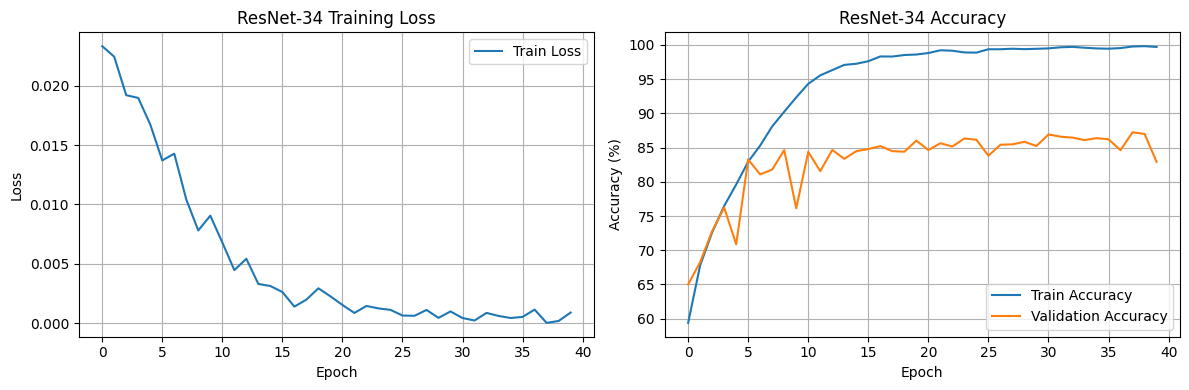

In [ ]:
import matplotlib.pyplot as plt
    
plt.figure(figsize=(12, 4))
    
    # Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(resnet_34_train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet-34 Training Loss')
plt.legend()
plt.grid(True)
    
    # Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(resnet_34_train_accuracy, label='Train Accuracy')
plt.plot(resnet_34_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('ResNet-34 Accuracy')
plt.legend()
plt.grid(True)
    
plt.tight_layout()
plt.savefig('resnet34_training_curves.png')
print("Training curves saved as 'resnet34_training_curves.png'")
plt.show()
    



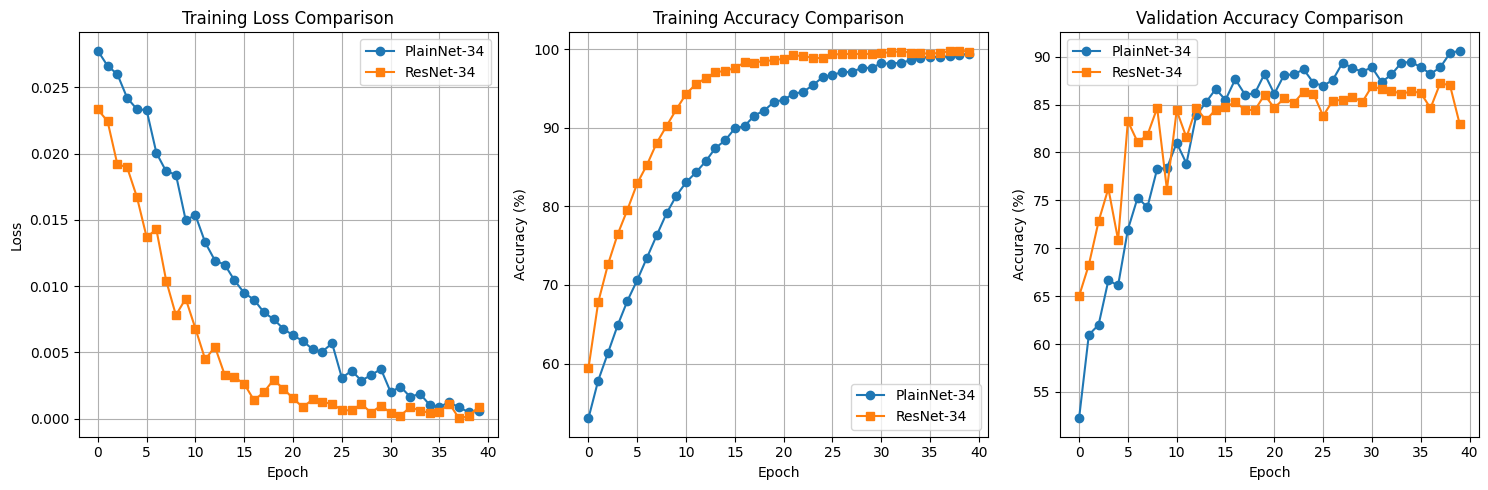


Ablation Study Results
PlainNet-34 Best Val Acc: 90.62%
ResNet-34 Best Val Acc:   87.24%
Improvement with Skip Connection: -3.38%


In [ ]:
import matplotlib.pyplot as plt

# PlainNet-34와 ResNet-34 결과 비교
plt.figure(figsize=(15, 5))

# Train Loss 비교
plt.subplot(1, 3, 1)
plt.plot(plainnet_34_train_losses, label='PlainNet-34', marker='o')
plt.plot(resnet_34_train_losses, label='ResNet-34', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)

# Train Accuracy 비교
plt.subplot(1, 3, 2)
plt.plot(plainnet_34_train_accuracy, label='PlainNet-34', marker='o')
plt.plot(resnet_34_train_accuracy, label='ResNet-34', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)

# Validation Accuracy 비교
plt.subplot(1, 3, 3)
plt.plot(plainnet_34_val_accuracy, label='PlainNet-34', marker='o')
plt.plot(resnet_34_val_accuracy, label='ResNet-34', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('ablation_study_comparison.png')
plt.show()

print("\n" + "=" * 60)
print("Ablation Study Results")
print("=" * 60)
print(f"PlainNet-34 Best Val Acc: {max(plainnet_34_val_accuracy):.2f}%")
print(f"ResNet-34 Best Val Acc:   {max(resnet_34_val_accuracy):.2f}%")
print(f"Improvement with Skip Connection: {max(resnet_34_val_accuracy) - max(plainnet_34_val_accuracy):.2f}%")

In [5]:
class ResidualBottleneck(nn.Module):
    """ResNet의 Bottleneck 블록 (skip connection 포함)"""
    expansion = 4  # 출력 채널 = in_channels * 4
    
    def __init__(self, in_channels, mid_channels, stride=1):
        super(ResidualBottleneck, self).__init__()
        
        # 1x1 conv (channel reduction)
        self.conv1 = nn.Conv2d(in_channels, mid_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(mid_channels)
        
        # 3x3 conv (spatial processing)
        self.conv2 = nn.Conv2d(mid_channels, mid_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(mid_channels)
        
        # 1x1 conv (channel expansion)
        self.conv3 = nn.Conv2d(mid_channels, mid_channels * self.expansion, 
                               kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(mid_channels * self.expansion)
        
        self.relu = nn.ReLU(inplace=True)
        
        # Shortcut connection (identity mapping or projection)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != mid_channels * self.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, mid_channels * self.expansion, 
                         kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(mid_channels * self.expansion)
            )
        
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        
        # Skip connection
        out += self.shortcut(identity)
        out = self.relu(out)
        
        return out


class ResNet50(nn.Module):
    """ResNet-50 (노드 스타일)"""
    
    def __init__(self, num_blocks_list=[3, 4, 6, 3], channel_list=[64, 128, 256, 512], num_classes=2):
        super(ResNet50, self).__init__()
        assert len(num_blocks_list) == len(channel_list), "num_blocks_list와 channel_list의 길이가 일치해야 합니다."
        
        # conv1: 7x7 conv + maxpool
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        # conv2_x ~ conv5_x
        layers = []
        in_channels = 64
        
        for block_idx, (num_blocks, mid_channels) in enumerate(zip(num_blocks_list, channel_list)):
            # 첫 번째 stage는 stride=1, 나머지는 stride=2로 다운샘플링
            if block_idx == 0:
                layers.append(self._make_resnet_stage(in_channels, mid_channels, num_blocks, stride=1))
            else:
                layers.append(self._make_resnet_stage(in_channels, mid_channels, num_blocks, stride=2))
            in_channels = mid_channels * ResidualBottleneck.expansion
        
        self.feature_extractor = nn.Sequential(*layers)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512 * ResidualBottleneck.expansion, num_classes)
        )
        
        # Weight 초기화
        self._initialize_weights()
    
    def _make_resnet_stage(self, in_channels, mid_channels, num_blocks, stride):
        """ResNet stage 생성 (Bottleneck with skip connection)"""
        layers = []
        
        # 첫 번째 블록 (다운샘플링 가능)
        layers.append(ResidualBottleneck(in_channels, mid_channels, stride))
        
        # 나머지 블록들 (stride=1)
        for _ in range(1, num_blocks):
            layers.append(ResidualBottleneck(mid_channels * ResidualBottleneck.expansion, 
                                            mid_channels, stride=1))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        """가중치 초기화 (He initialization)"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = self.conv1(x)              # 224x224 -> 56x56
        x = self.feature_extractor(x)  # 56x56 -> 7x7
        x = self.classifier(x)         # 7x7 -> 1x1 -> num_classes
        return x




In [ ]:
# 테스트 코드
if __name__ == "__main__":
    # ResNet-50 생성 (VGG 스타일)
    resnet_50 = ResNet50(
        num_blocks_list=[3, 4, 6, 3],
        channel_list=[64, 128, 256, 512],
        num_classes=2
    )
    
    print("=" * 60)
    print("ResNet-50 Model Architecture (노드 스타일)")
    print("=" * 60)
    print(resnet_50)
    print("\n" + "=" * 60)
    
    # 더미 입력으로 테스트
    dummy_input = torch.randn(1, 3, 224, 224)
    
    print("\nLayer-wise Output Shapes:")
    print("=" * 60)
    
    x = dummy_input
    print(f"Input:         {x.shape}")
    
    # conv1
    x = resnet_50.conv1(x)
    print(f"After conv1:   {x.shape}")
    
    # feature extractor (conv2_x ~ conv5_x)
    for idx, layer in enumerate(resnet_50.feature_extractor):
        x = layer(x)
        stage_name = ['conv2_x', 'conv3_x', 'conv4_x', 'conv5_x'][idx]
        print(f"After {stage_name}: {x.shape}")
    
    # classifier
    x = resnet_50.classifier(x)
    print(f"Final output:  {x.shape}")
    
    print("=" * 60)
    
    # 전체 forward pass
    output = resnet_50(dummy_input)
    print(f"\nFinal model output shape: {output.shape}")
    
    # 파라미터 수 계산
    total_params = sum(p.numel() for p in resnet_50.parameters())
    trainable_params = sum(p.numel() for p in resnet_50.parameters() if p.requires_grad)
    print(f"\nTotal parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    
    print("\n" + "=" * 60)
    print("ResNet-50 Configuration:")
    print("=" * 60)
    print(f"num_blocks_list = [3, 4, 6, 3]  # conv2_x ~ conv5_x")
    print(f"channel_list = [64, 128, 256, 512]  # bottleneck 중간 채널")
    print(f"실제 출력 채널 = [256, 512, 1024, 2048]  # mid_channels * 4")
    print(f"num_classes = 2  # ImageNet")
    
    print("\n" + "=" * 60)
    print("PlainNet-50 vs ResNet-50 차이점:")
    print("=" * 60)
    print("PlainNet-50: Skip connection 없음")
    print("             output = F(x)")
    print("\nResNet-50:   Skip connection 있음")
    print("             output = F(x) + x")
    print("\n두 모델 모두 Bottleneck 구조 사용:")
    print("[1x1, 64] -> [3x3, 64] -> [1x1, 256]")

ResNet-50 Model Architecture (노드 스타일)
ResNet50(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): ResidualBottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

In [6]:
class PlainBottleneck(nn.Module):
    """PlainNet의 Bottleneck 블록 (skip connection 없음)"""
    expansion = 4  # 출력 채널 = in_channels * 4
    
    def __init__(self, in_channels, mid_channels, stride=1):
        super(PlainBottleneck, self).__init__()
        
        # 1x1 conv (channel reduction)
        self.conv1 = nn.Conv2d(in_channels, mid_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(mid_channels)
        
        # 3x3 conv (spatial processing)
        self.conv2 = nn.Conv2d(mid_channels, mid_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(mid_channels)
        
        # 1x1 conv (channel expansion)
        self.conv3 = nn.Conv2d(mid_channels, mid_channels * self.expansion, 
                               kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(mid_channels * self.expansion)
        
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        out = self.relu(out)
        
        return out


class PlainNet50(nn.Module):
    """PlainNet-50 (VGG 스타일 구현)"""
    
    def __init__(self, num_blocks_list=[3, 4, 6, 3], channel_list=[64, 128, 256, 512], num_classes=2):
        super(PlainNet50, self).__init__()
        assert len(num_blocks_list) == len(channel_list), "num_blocks_list와 channel_list의 길이가 일치해야 합니다."
        
        # conv1: 7x7 conv + maxpool
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        # conv2_x ~ conv5_x
        layers = []
        in_channels = 64
        
        for block_idx, (num_blocks, mid_channels) in enumerate(zip(num_blocks_list, channel_list)):
            # 첫 번째 stage는 stride=1, 나머지는 stride=2로 다운샘플링
            if block_idx == 0:
                layers.append(self._make_plainnet_stage(in_channels, mid_channels, num_blocks, stride=1))
            else:
                layers.append(self._make_plainnet_stage(in_channels, mid_channels, num_blocks, stride=2))
            in_channels = mid_channels * PlainBottleneck.expansion
        
        self.feature_extractor = nn.Sequential(*layers)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512 * PlainBottleneck.expansion, num_classes)
        )
        
        # Weight 초기화
        self._initialize_weights()
    
    def _make_plainnet_stage(self, in_channels, mid_channels, num_blocks, stride):
        """PlainNet stage 생성 (Bottleneck)"""
        layers = []
        
        # 첫 번째 블록 (다운샘플링 가능)
        layers.append(PlainBottleneck(in_channels, mid_channels, stride))
        
        # 나머지 블록들 (stride=1)
        for _ in range(1, num_blocks):
            layers.append(PlainBottleneck(mid_channels * PlainBottleneck.expansion, 
                                         mid_channels, stride=1))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        """가중치 초기화 (He initialization)"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = self.conv1(x)              # 224x224 -> 56x56
        x = self.feature_extractor(x)  # 56x56 -> 7x7
        x = self.classifier(x)         # 7x7 -> 1x1 -> num_classes
        return x




In [ ]:
# 테스트 코드
if __name__ == "__main__":
    # PlainNet-50 생성 (VGG 스타일)
    plainnet_50 = PlainNet50(
        num_blocks_list=[3, 4, 6, 3],
        channel_list=[64, 128, 256, 512],
        num_classes=2
    )
    
    print("=" * 60)
    print("PlainNet-50 Model Architecture (VGG Style)")
    print("=" * 60)
    print(plainnet_50)
    print("\n" + "=" * 60)
    
    # 더미 입력으로 테스트
    dummy_input = torch.randn(1, 3, 224, 224)
    
    print("\nLayer-wise Output Shapes:")
    print("=" * 60)
    
    x = dummy_input
    print(f"Input:         {x.shape}")
    
    # conv1
    x = plainnet_50.conv1(x)
    print(f"After conv1:   {x.shape}")
    
    # feature extractor (conv2_x ~ conv5_x)
    for idx, layer in enumerate(plainnet_50.feature_extractor):
        x = layer(x)
        stage_name = ['conv2_x', 'conv3_x', 'conv4_x', 'conv5_x'][idx]
        print(f"After {stage_name}: {x.shape}")
    
    # classifier
    x = plainnet_50.classifier(x)
    print(f"Final output:  {x.shape}")
    
    print("=" * 60)
    
    # 전체 forward pass
    output = plainnet_50(dummy_input)
    print(f"\nFinal model output shape: {output.shape}")
    
    # 파라미터 수 계산
    total_params = sum(p.numel() for p in plainnet_50.parameters())
    trainable_params = sum(p.numel() for p in plainnet_50.parameters() if p.requires_grad)
    print(f"\nTotal parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    
    print("\n" + "=" * 60)
    print("PlainNet-50 Configuration:")
    print("=" * 60)
    print(f"num_blocks_list = [3, 4, 6, 3]  # conv2_x ~ conv5_x")
    print(f"channel_list = [64, 128, 256, 512]  # bottleneck 중간 채널")
    print(f"실제 출력 채널 = [256, 512, 1024, 2048]  # mid_channels * 4")
    print(f"num_classes = 2  # ImageNet")
    
    print("\n" + "=" * 60)
    print("PlainNet-34 vs PlainNet-50 차이점:")
    print("=" * 60)
    print("PlainNet-34: Basic Block [3x3, 64] x 2")
    print("PlainNet-50: Bottleneck [1x1, 64] -> [3x3, 64] -> [1x1, 256]")

PlainNet-50 Model Architecture (VGG Style)
PlainNet50(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): PlainBottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [ ]:
import time

# ResNet-50 모델 import (위에서 정의한 ResNet50 클래스 사용)
# from resnet50 import ResNet50

EPOCH = 40  # 에폭 수 설정

# 학습 시작
current_time = time.time()

# Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ResNet-50 모델 생성 (개/고양이 분류)
resnet_50 = ResNet50(
    num_blocks_list=[3, 4, 6, 3],
    channel_list=[64, 128, 256, 512],
    num_classes=2  # 개, 고양이
)
resnet_50.to(device)

# 모든 파라미터 학습 가능하도록 설정
for param in resnet_50.parameters():
    param.requires_grad = True

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet_50.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# 학습 기록 저장
resnet_50_train_losses = []
resnet_50_train_accuracy = []
resnet_50_val_accuracy = []

print("=" * 60)
print("Starting ResNet-50 Training")
print("=" * 60)

for epoch in range(EPOCH):
    # Training Phase
    resnet_50.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = resnet_50(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print progress every 100 batches
        if i % 100 == 99:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # Epoch statistics
    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    resnet_50_train_losses.append(train_loss)
    resnet_50_train_accuracy.append(train_acc)

    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation Phase
    resnet_50.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet_50(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    resnet_50_val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}: Validation Accuracy: {val_acc:.2f}%")
    print("-" * 60)

print("=" * 60)
print("Finished Training")
print(f"Total training time: {time.time() - current_time:.2f} seconds")
print("=" * 60)

# 최종 결과 요약
print("\nTraining Summary:")
print(f"Best Train Accuracy: {max(resnet_50_train_accuracy):.2f}%")
print(f"Best Validation Accuracy: {max(resnet_50_val_accuracy):.2f}%")
print(f"Final Train Accuracy: {resnet_50_train_accuracy[-1]:.2f}%")
print(f"Final Validation Accuracy: {resnet_50_val_accuracy[-1]:.2f}%")

# 모델 저장 (선택사항)
torch.save(resnet_50.state_dict(), 'resnet50_catdog.pth')
print("\nModel saved as 'resnet50_catdog.pth'")



Using device: cuda
Starting ResNet-50 Training
[1,   100] loss: 0.850
[1,   200] loss: 0.975
[1,   300] loss: 0.758
[1,   400] loss: 0.789
[1,   500] loss: 0.765
[1,   600] loss: 0.874
Epoch 1: Train Loss: 0.0288, Train Accuracy: 52.23%
Epoch 1: Validation Accuracy: 55.40%
------------------------------------------------------------
[2,   100] loss: 0.747
[2,   200] loss: 0.766
[2,   300] loss: 0.776
[2,   400] loss: 0.738
[2,   500] loss: 0.733
[2,   600] loss: 0.738
Epoch 2: Train Loss: 0.0278, Train Accuracy: 58.22%
Epoch 2: Validation Accuracy: 59.90%
------------------------------------------------------------
[3,   100] loss: 0.702
[3,   200] loss: 0.688
[3,   300] loss: 0.660
[3,   400] loss: 0.662
[3,   500] loss: 0.697
[3,   600] loss: 0.709
Epoch 3: Train Loss: 0.0260, Train Accuracy: 62.85%
Epoch 3: Validation Accuracy: 66.08%
------------------------------------------------------------
[4,   100] loss: 0.631
[4,   200] loss: 0.638
[4,   300] loss: 0.650
[4,   400] loss: 0.6

Training curves saved as 'resnet50_training_curves.png'


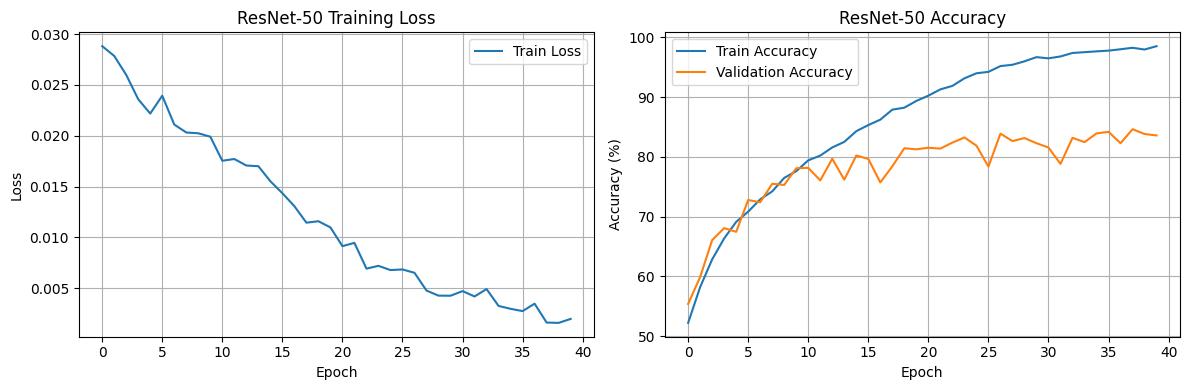

In [ ]:
plt.figure(figsize=(12, 4))
    
    # Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(resnet_50_train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet-50 Training Loss')
plt.legend()
plt.grid(True)
    
    # Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(resnet_50_train_accuracy, label='Train Accuracy')
plt.plot(resnet_50_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('ResNet-50 Accuracy')
plt.legend()
plt.grid(True)
    
plt.tight_layout()
plt.savefig('resnet50_training_curves.png')
print("Training curves saved as 'resnet50_training_curves.png'")
plt.show()
    


In [ ]:
import time

# PlainNet-50 모델 import (위에서 정의한 PlainNet50 클래스 사용)
# from plainnet50 import PlainNet50

EPOCH = 40  # 에폭 수 설정

# 학습 시작
current_time = time.time()

# Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# PlainNet-50 모델 생성 (개/고양이 분류)
plainnet_50 = PlainNet50(
    num_blocks_list=[3, 4, 6, 3],
    channel_list=[64, 128, 256, 512],
    num_classes=2  # 개, 고양이
)
plainnet_50.to(device)

# 모든 파라미터 학습 가능하도록 설정
for param in plainnet_50.parameters():
    param.requires_grad = True

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(plainnet_50.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# 학습 기록 저장
plainnet_50_train_losses = []
plainnet_50_train_accuracy = []
plainnet_50_val_accuracy = []

print("=" * 60)
print("Starting PlainNet-50 Training")
print("=" * 60)

for epoch in range(EPOCH):
    # Training Phase
    plainnet_50.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = plainnet_50(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print progress every 100 batches
        if i % 100 == 99:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # Epoch statistics
    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    plainnet_50_train_losses.append(train_loss)
    plainnet_50_train_accuracy.append(train_acc)

    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation Phase
    plainnet_50.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = plainnet_50(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    plainnet_50_val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}: Validation Accuracy: {val_acc:.2f}%")
    print("-" * 60)

print("=" * 60)
print("Finished Training")
print(f"Total training time: {time.time() - current_time:.2f} seconds")
print("=" * 60)

# 최종 결과 요약
print("\nTraining Summary:")
print(f"Best Train Accuracy: {max(plainnet_50_train_accuracy):.2f}%")
print(f"Best Validation Accuracy: {max(plainnet_50_val_accuracy):.2f}%")
print(f"Final Train Accuracy: {plainnet_50_train_accuracy[-1]:.2f}%")
print(f"Final Validation Accuracy: {plainnet_50_val_accuracy[-1]:.2f}%")

# 모델 저장 (선택사항)
torch.save(plainnet_50.state_dict(), 'plainnet50_catdog.pth')
print("\nModel saved as 'plainnet50_catdog.pth'")



Using device: cuda
Starting PlainNet-50 Training
[1,   100] loss: 0.708
[1,   200] loss: 0.694
[1,   300] loss: 0.688
[1,   400] loss: 0.695
[1,   500] loss: 0.697
[1,   600] loss: 0.690
Epoch 1: Train Loss: 0.0271, Train Accuracy: 54.13%
Epoch 1: Validation Accuracy: 56.80%
------------------------------------------------------------
[2,   100] loss: 0.695
[2,   200] loss: 0.695
[2,   300] loss: 0.694
[2,   400] loss: 0.690
[2,   500] loss: 0.699
[2,   600] loss: 0.700
Epoch 2: Train Loss: 0.0276, Train Accuracy: 54.59%
Epoch 2: Validation Accuracy: 55.80%
------------------------------------------------------------
[3,   100] loss: 0.686
[3,   200] loss: 0.701
[3,   300] loss: 0.694
[3,   400] loss: 0.694
[3,   500] loss: 0.701
[3,   600] loss: 0.683
Epoch 3: Train Loss: 0.0281, Train Accuracy: 54.54%
Epoch 3: Validation Accuracy: 57.96%
------------------------------------------------------------
[4,   100] loss: 0.684
[4,   200] loss: 0.694
[4,   300] loss: 0.688
[4,   400] loss: 0

Training curves saved as 'plainnet50_training_curves.png'


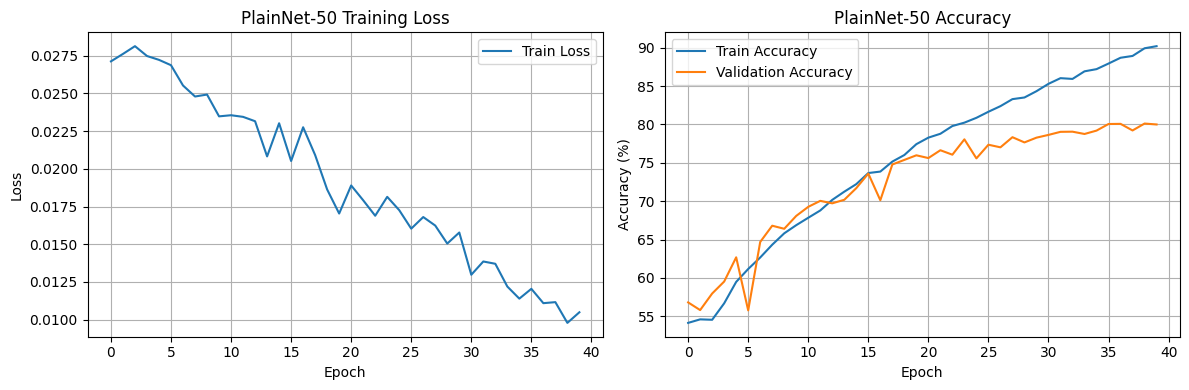

In [ ]:
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(plainnet_50_train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('PlainNet-50 Training Loss')
plt.legend()
plt.grid(True)

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(plainnet_50_train_accuracy, label='Train Accuracy')
plt.plot(plainnet_50_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('PlainNet-50 Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('plainnet50_training_curves.png')
print("Training curves saved as 'plainnet50_training_curves.png'")
plt.show()

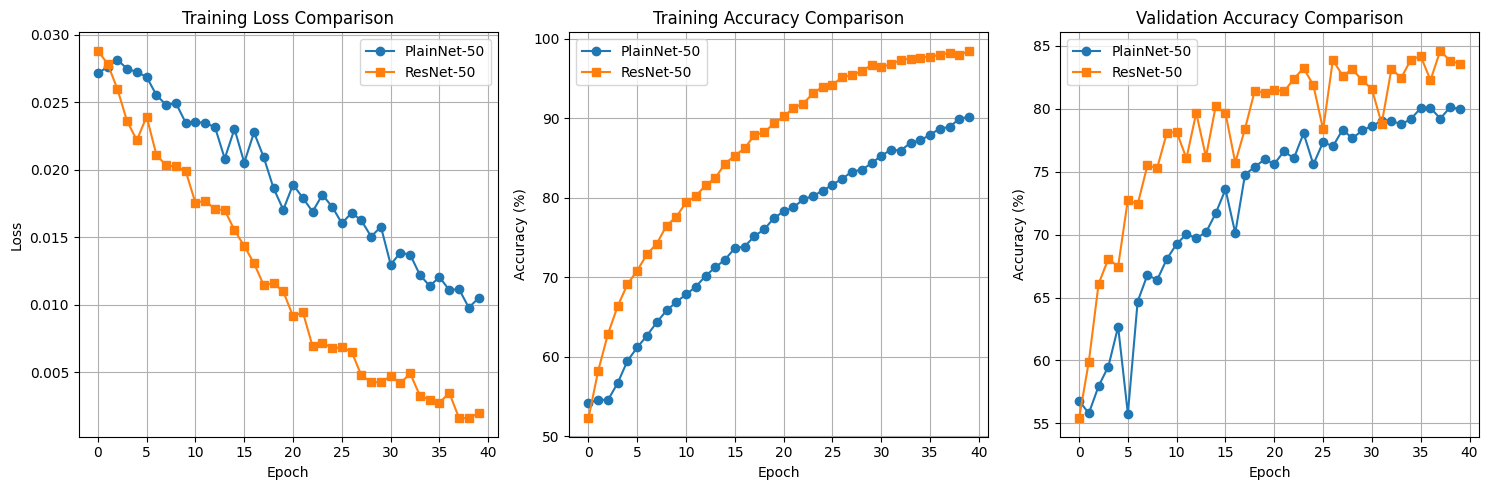


Ablation Study Results
PlainNet-34 Best Val Acc: 80.12%
ResNet-34 Best Val Acc:   84.62%
Improvement with Skip Connection: 4.50%


In [ ]:
import matplotlib.pyplot as plt

# PlainNet-34와 ResNet-34 결과 비교
plt.figure(figsize=(15, 5))

# Train Loss 비교
plt.subplot(1, 3, 1)
plt.plot(plainnet_50_train_losses, label='PlainNet-50', marker='o')
plt.plot(resnet_50_train_losses, label='ResNet-50', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)

# Train Accuracy 비교
plt.subplot(1, 3, 2)
plt.plot(plainnet_50_train_accuracy, label='PlainNet-50', marker='o')
plt.plot(resnet_50_train_accuracy, label='ResNet-50', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)

# Validation Accuracy 비교
plt.subplot(1, 3, 3)
plt.plot(plainnet_50_val_accuracy, label='PlainNet-50', marker='o')
plt.plot(resnet_50_val_accuracy, label='ResNet-50', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('ablation_study_comparison.png')
plt.show()

print("\n" + "=" * 60)
print("Ablation Study Results")
print("=" * 60)
print(f"PlainNet-34 Best Val Acc: {max(plainnet_50_val_accuracy):.2f}%")
print(f"ResNet-34 Best Val Acc:   {max(resnet_50_val_accuracy):.2f}%")
print(f"Improvement with Skip Connection: {max(resnet_50_val_accuracy) - max(plainnet_50_val_accuracy):.2f}%")

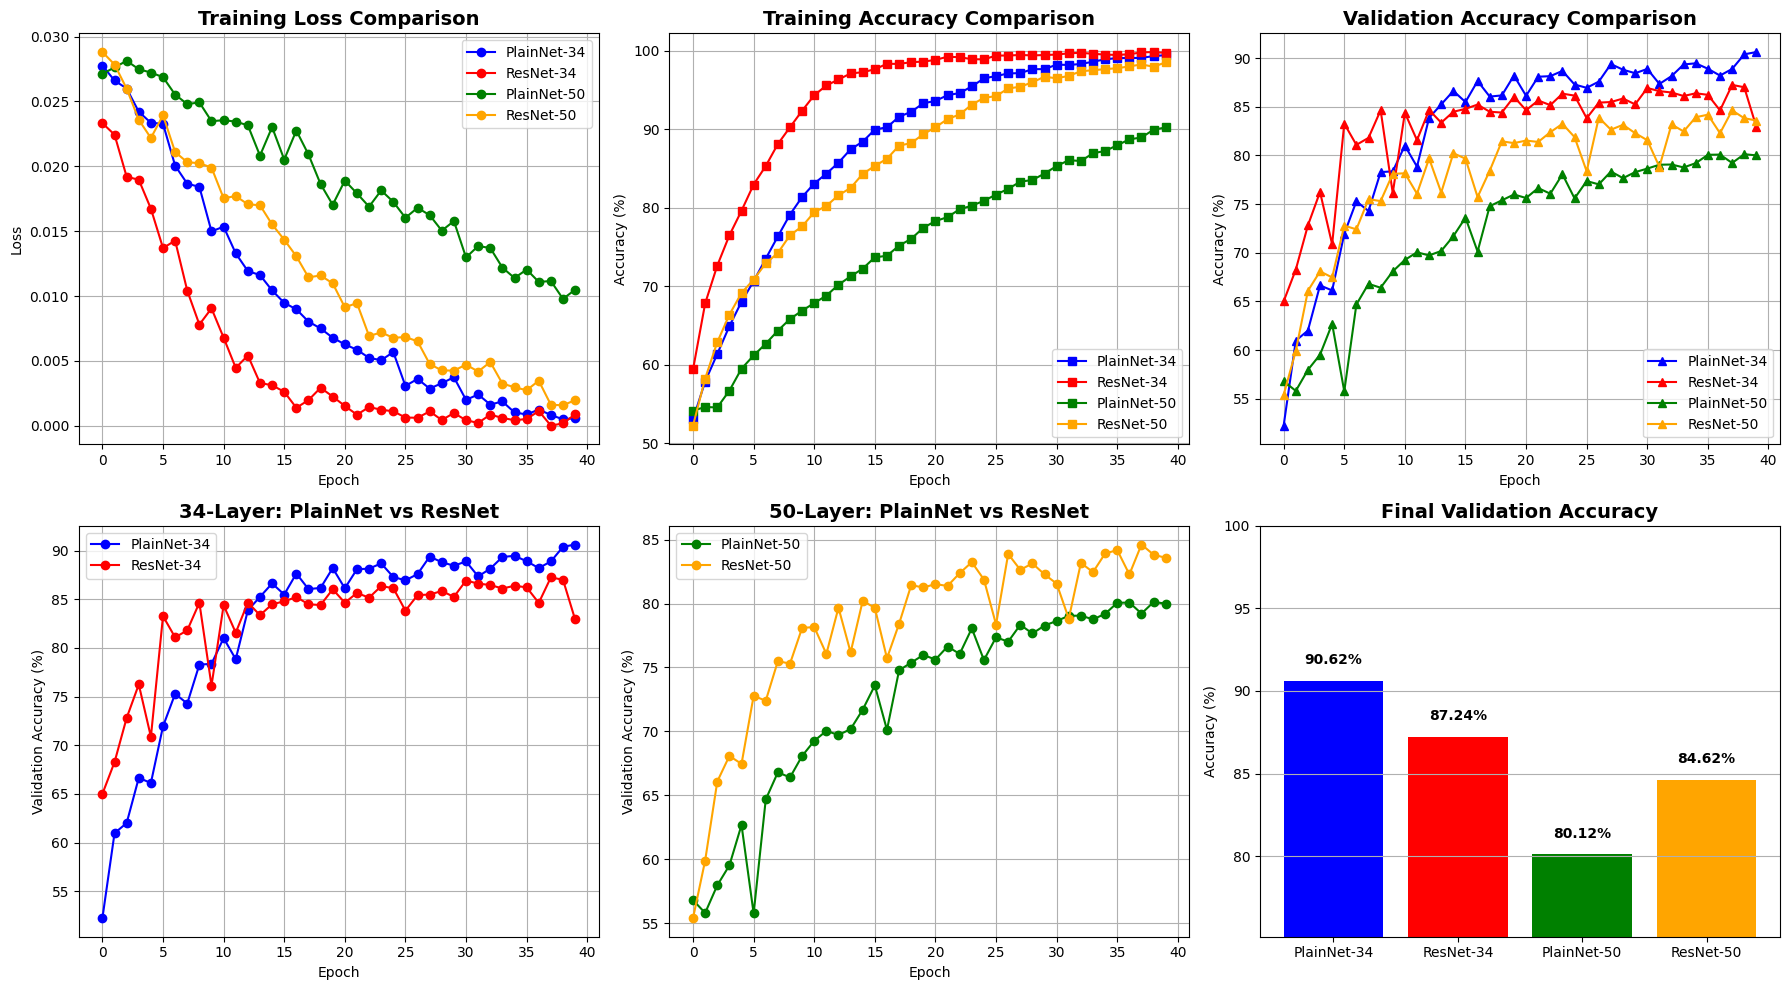


Complete Ablation Study Results
PlainNet-34    : 90.62%
ResNet-34      : 87.24%
PlainNet-50    : 80.12%
ResNet-50      : 84.62%


In [ ]:
import matplotlib.pyplot as plt

# 4개 모델 결과 비교
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

models = ['PlainNet-34', 'ResNet-34', 'PlainNet-50', 'ResNet-50']
train_losses = [plainnet_34_train_losses, resnet_34_train_losses, 
                plainnet_50_train_losses, resnet_50_train_losses]
train_accs = [plainnet_34_train_accuracy, resnet_34_train_accuracy,
              plainnet_50_train_accuracy, resnet_50_train_accuracy]
val_accs = [plainnet_34_val_accuracy, resnet_34_val_accuracy,
            plainnet_50_val_accuracy, resnet_50_val_accuracy]

colors = ['blue', 'red', 'green', 'orange']

# Train Loss 비교
axes[0, 0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
for i, (model, loss, color) in enumerate(zip(models, train_losses, colors)):
    axes[0, 0].plot(loss, label=model, marker='o', color=color)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Train Accuracy 비교
axes[0, 1].set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
for i, (model, acc, color) in enumerate(zip(models, train_accs, colors)):
    axes[0, 1].plot(acc, label=model, marker='s', color=color)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Validation Accuracy 비교
axes[0, 2].set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
for i, (model, acc, color) in enumerate(zip(models, val_accs, colors)):
    axes[0, 2].plot(acc, label=model, marker='^', color=color)
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Accuracy (%)')
axes[0, 2].legend()
axes[0, 2].grid(True)

# PlainNet vs ResNet (34-layer)
axes[1, 0].set_title('34-Layer: PlainNet vs ResNet', fontsize=14, fontweight='bold')
axes[1, 0].plot(plainnet_34_val_accuracy, label='PlainNet-34', marker='o', color='blue')
axes[1, 0].plot(resnet_34_val_accuracy, label='ResNet-34', marker='o', color='red')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Validation Accuracy (%)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# PlainNet vs ResNet (50-layer)
axes[1, 1].set_title('50-Layer: PlainNet vs ResNet', fontsize=14, fontweight='bold')
axes[1, 1].plot(plainnet_50_val_accuracy, label='PlainNet-50', marker='o', color='green')
axes[1, 1].plot(resnet_50_val_accuracy, label='ResNet-50', marker='o', color='orange')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Validation Accuracy (%)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# 최종 성능 비교 (Bar chart)
axes[1, 2].set_title('Final Validation Accuracy', fontsize=14, fontweight='bold')
final_accs = [max(acc) for acc in val_accs]
axes[1, 2].bar(models, final_accs, color=colors)
axes[1, 2].set_ylabel('Accuracy (%)')
axes[1, 2].set_ylim([min(final_accs) - 5, 100])
for i, acc in enumerate(final_accs):
    axes[1, 2].text(i, acc + 1, f'{acc:.2f}%', ha='center', fontweight='bold')
axes[1, 2].grid(True, axis='y')

plt.tight_layout()
plt.savefig('complete_ablation_study.png', dpi=300)
plt.show()

print("\n" + "=" * 60)
print("Complete Ablation Study Results")
print("=" * 60)
for model, acc in zip(models, final_accs):
    print(f"{model:15s}: {acc:.2f}%")

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# 모델 정의 (위에서 정의한 클래스 사용)
# from plainnet34 import PlainNet34
# from resnet34 import ResNet34
# from plainnet50 import PlainNet50
# from resnet50 import ResNet50


def load_model_weights(model, weight_path):
    """저장된 가중치 불러오기"""
    model.load_state_dict(torch.load(weight_path, map_location='cpu'))
    print(f"Loaded weights from {weight_path}")
    return model


def visualize_conv_weights(model, layer_name=None, max_filters=64):
    """
    Conv layer의 가중치 시각화
    
    Args:
        model: PyTorch 모델
        layer_name: 특정 레이어 이름 (None이면 첫 번째 conv layer)
        max_filters: 시각화할 최대 필터 개수
    """
    conv_layers = []
    layer_names = []
    
    # 모든 Conv2d 레이어 찾기
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            conv_layers.append(module)
            layer_names.append(name)
    
    print(f"\nFound {len(conv_layers)} Conv2d layers:")
    for i, name in enumerate(layer_names):
        print(f"  [{i}] {name}")
    
    # 특정 레이어 선택 또는 첫 번째 레이어
    if layer_name:
        idx = layer_names.index(layer_name)
        layer = conv_layers[idx]
        title = layer_name
    else:
        layer = conv_layers[0]
        title = layer_names[0]
        idx = 0
    
    # 가중치 추출
    weights = layer.weight.data.cpu().numpy()
    print(f"\n\nVisualizing layer: {title}")
    print(f"Weight shape: {weights.shape}")  # [out_channels, in_channels, height, width]
    
    num_filters = min(weights.shape[0], max_filters)
    num_cols = 8
    num_rows = (num_filters + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 2.5))
    fig.suptitle(f'Conv Filters: {title}\nShape: {weights.shape}', fontsize=16, fontweight='bold')
    
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i in range(num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        
        if i < num_filters:
            # 첫 번째 입력 채널의 필터 시각화
            filter_img = weights[i, 0, :, :]
            
            # 정규화
            vmin, vmax = filter_img.min(), filter_img.max()
            filter_img_norm = (filter_img - vmin) / (vmax - vmin + 1e-8)
            
            axes[row, col].imshow(filter_img_norm, cmap='viridis')
            axes[row, col].set_title(f'Filter {i}', fontsize=10)
            axes[row, col].axis('off')
        else:
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'conv_filters_{idx}_{title.replace(".", "_")}.png', dpi=150)
    print(f"Saved: conv_filters_{idx}_{title.replace('.', '_')}.png")
    plt.show()


def visualize_weight_distribution(model, model_name='Model'):
    """
    모델의 전체 가중치 분포 시각화
    
    Args:
        model: PyTorch 모델
        model_name: 모델 이름
    """
    conv_weights = []
    bn_weights = []
    fc_weights = []
    
    print(f"\n[Analyzing {model_name} parameters...]")
    for name, param in model.named_parameters():
        if 'weight' not in name:
            continue
            
        param_flat = param.data.cpu().numpy().flatten()
        
        # Conv layer 판별: 4D 텐서 (out_channels, in_channels, height, width)
        if len(param.shape) == 4:
            conv_weights.extend(param_flat)
            print(f"  Conv: {name:50s} - shape: {tuple(param.shape)}")
        # BatchNorm layer 판별: 1D 텐서 (channels,)
        elif len(param.shape) == 1:
            bn_weights.extend(param_flat)
            print(f"  BN:   {name:50s} - shape: {tuple(param.shape)}")
        # FC layer 판별: 2D 텐서 (out_features, in_features)
        elif len(param.shape) == 2:
            fc_weights.extend(param_flat)
            print(f"  FC:   {name:50s} - shape: {tuple(param.shape)}")
    
    print(f"\nCollected weights:")
    print(f"  Conv weights: {len(conv_weights):,}")
    print(f"  BN weights: {len(bn_weights):,}")
    print(f"  FC weights: {len(fc_weights):,}")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{model_name} - Weight Distribution', fontsize=16, fontweight='bold')
    
    # Conv weights
    if len(conv_weights) > 0:
        axes[0].hist(conv_weights, bins=100, alpha=0.7, color='blue', edgecolor='black')
        axes[0].set_title(f'Conv Weights\n(Total: {len(conv_weights):,})', fontsize=12)
        axes[0].set_xlabel('Weight Value')
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True, alpha=0.3)
    else:
        axes[0].text(0.5, 0.5, 'No Conv Weights', ha='center', va='center', fontsize=14)
        axes[0].set_title('Conv Weights', fontsize=12)
    
    # BatchNorm weights
    if len(bn_weights) > 0:
        axes[1].hist(bn_weights, bins=100, alpha=0.7, color='green', edgecolor='black')
        axes[1].set_title(f'BatchNorm Weights\n(Total: {len(bn_weights):,})', fontsize=12)
        axes[1].set_xlabel('Weight Value')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3)
    else:
        axes[1].text(0.5, 0.5, 'No BatchNorm Weights', ha='center', va='center', fontsize=14)
        axes[1].set_title('BatchNorm Weights', fontsize=12)
    
    # FC weights
    if len(fc_weights) > 0:
        axes[2].hist(fc_weights, bins=100, alpha=0.7, color='red', edgecolor='black')
        axes[2].set_title(f'FC Weights\n(Total: {len(fc_weights):,})', fontsize=12)
        axes[2].set_xlabel('Weight Value')
        axes[2].set_ylabel('Frequency')
        axes[2].grid(True, alpha=0.3)
    else:
        axes[2].text(0.5, 0.5, 'No FC Weights', ha='center', va='center', fontsize=14)
        axes[2].set_title('FC Weights', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_weight_distribution.png', dpi=150)
    print(f"Saved: {model_name}_weight_distribution.png")
    plt.show()


def compare_layer_weights(model1, model2, model1_name='Model1', model2_name='Model2'):
    """
    두 모델의 레이어별 가중치 통계 비교
    
    Args:
        model1, model2: 비교할 두 모델
        model1_name, model2_name: 모델 이름
    """
    def get_layer_stats(model):
        stats = []
        for name, module in model.named_modules():
            if isinstance(module, nn.Conv2d):
                weights = module.weight.data.cpu().numpy()
                stats.append({
                    'name': name,
                    'mean': weights.mean(),
                    'std': weights.std(),
                    'min': weights.min(),
                    'max': weights.max()
                })
        return stats
    
    stats1 = get_layer_stats(model1)
    stats2 = get_layer_stats(model2)
    
    num_layers = min(len(stats1), len(stats2))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{model1_name} vs {model2_name} - Layer-wise Weight Statistics', 
                 fontsize=16, fontweight='bold')
    
    layers = range(num_layers)
    
    # Mean
    axes[0, 0].plot(layers, [s['mean'] for s in stats1[:num_layers]], 
                    marker='o', label=model1_name, linewidth=2)
    axes[0, 0].plot(layers, [s['mean'] for s in stats2[:num_layers]], 
                    marker='s', label=model2_name, linewidth=2)
    axes[0, 0].set_title('Weight Mean by Layer', fontsize=12)
    axes[0, 0].set_xlabel('Layer Index')
    axes[0, 0].set_ylabel('Mean')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Std
    axes[0, 1].plot(layers, [s['std'] for s in stats1[:num_layers]], 
                    marker='o', label=model1_name, linewidth=2)
    axes[0, 1].plot(layers, [s['std'] for s in stats2[:num_layers]], 
                    marker='s', label=model2_name, linewidth=2)
    axes[0, 1].set_title('Weight Std by Layer', fontsize=12)
    axes[0, 1].set_xlabel('Layer Index')
    axes[0, 1].set_ylabel('Std')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Min
    axes[1, 0].plot(layers, [s['min'] for s in stats1[:num_layers]], 
                    marker='o', label=model1_name, linewidth=2)
    axes[1, 0].plot(layers, [s['min'] for s in stats2[:num_layers]], 
                    marker='s', label=model2_name, linewidth=2)
    axes[1, 0].set_title('Weight Min by Layer', fontsize=12)
    axes[1, 0].set_xlabel('Layer Index')
    axes[1, 0].set_ylabel('Min')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Max
    axes[1, 1].plot(layers, [s['max'] for s in stats1[:num_layers]], 
                    marker='o', label=model1_name, linewidth=2)
    axes[1, 1].plot(layers, [s['max'] for s in stats2[:num_layers]], 
                    marker='s', label=model2_name, linewidth=2)
    axes[1, 1].set_title('Weight Max by Layer', fontsize=12)
    axes[1, 1].set_xlabel('Layer Index')
    axes[1, 1].set_ylabel('Max')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{model1_name}_vs_{model2_name}_weight_comparison.png', dpi=150)
    print(f"Saved: {model1_name}_vs_{model2_name}_weight_comparison.png")
    plt.show()





[Analyzing PlainNet-34 parameters...]
  Conv: conv1.0.weight                                     - shape: (64, 3, 7, 7)
  BN:   conv1.1.weight                                     - shape: (64,)
  Conv: conv2_5.0.0.weight                                 - shape: (64, 64, 3, 3)
  BN:   conv2_5.0.1.weight                                 - shape: (64,)
  Conv: conv2_5.0.3.weight                                 - shape: (64, 64, 3, 3)
  BN:   conv2_5.0.4.weight                                 - shape: (64,)
  Conv: conv2_5.0.6.weight                                 - shape: (64, 64, 3, 3)
  BN:   conv2_5.0.7.weight                                 - shape: (64,)
  Conv: conv2_5.0.9.weight                                 - shape: (64, 64, 3, 3)
  BN:   conv2_5.0.10.weight                                - shape: (64,)
  Conv: conv2_5.0.12.weight                                - shape: (64, 64, 3, 3)
  BN:   conv2_5.0.13.weight                                - shape: (64,)
  Conv: conv2_5.0.15

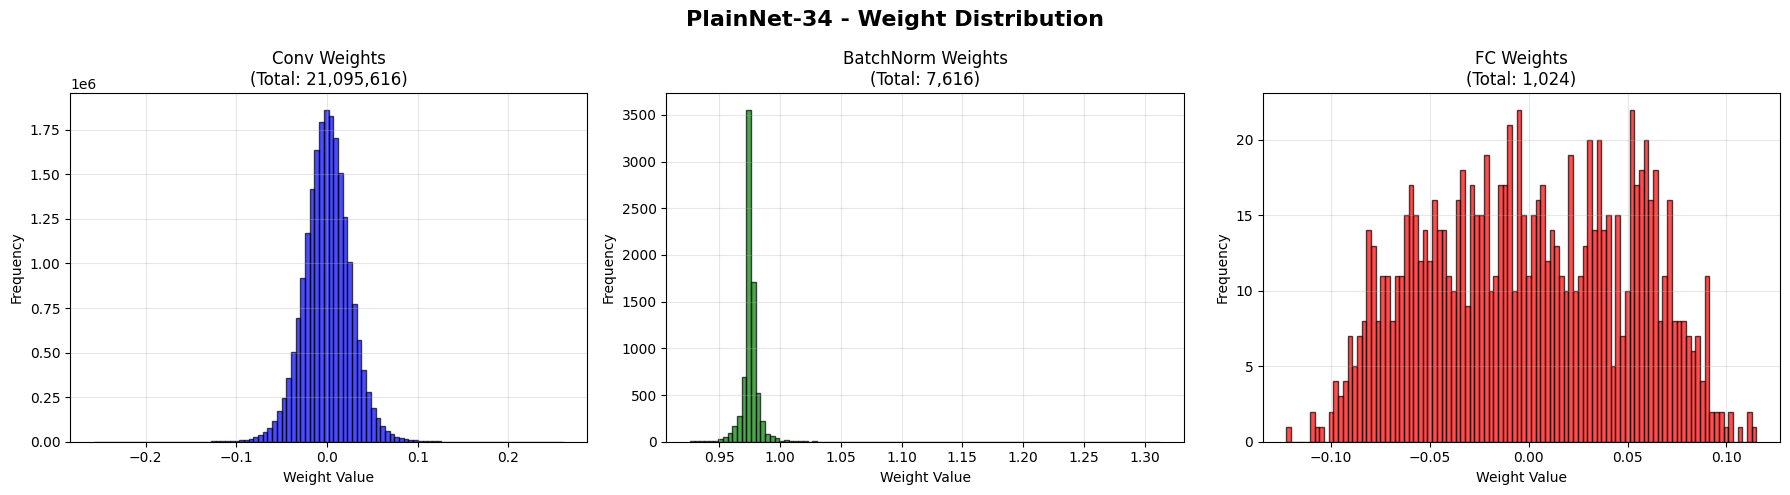


[Analyzing resnet-34 parameters...]
  Conv: conv1.0.weight                                     - shape: (64, 3, 7, 7)
  BN:   conv1.1.weight                                     - shape: (64,)
  Conv: feature_extractor.0.0.conv1.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.0.bn1.weight                   - shape: (64,)
  Conv: feature_extractor.0.0.conv2.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.0.bn2.weight                   - shape: (64,)
  Conv: feature_extractor.0.1.conv1.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.1.bn1.weight                   - shape: (64,)
  Conv: feature_extractor.0.1.conv2.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.1.bn2.weight                   - shape: (64,)
  Conv: feature_extractor.0.2.conv1.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.2.bn1.weight                   - shape: (64,)
  Conv: feature_extrac

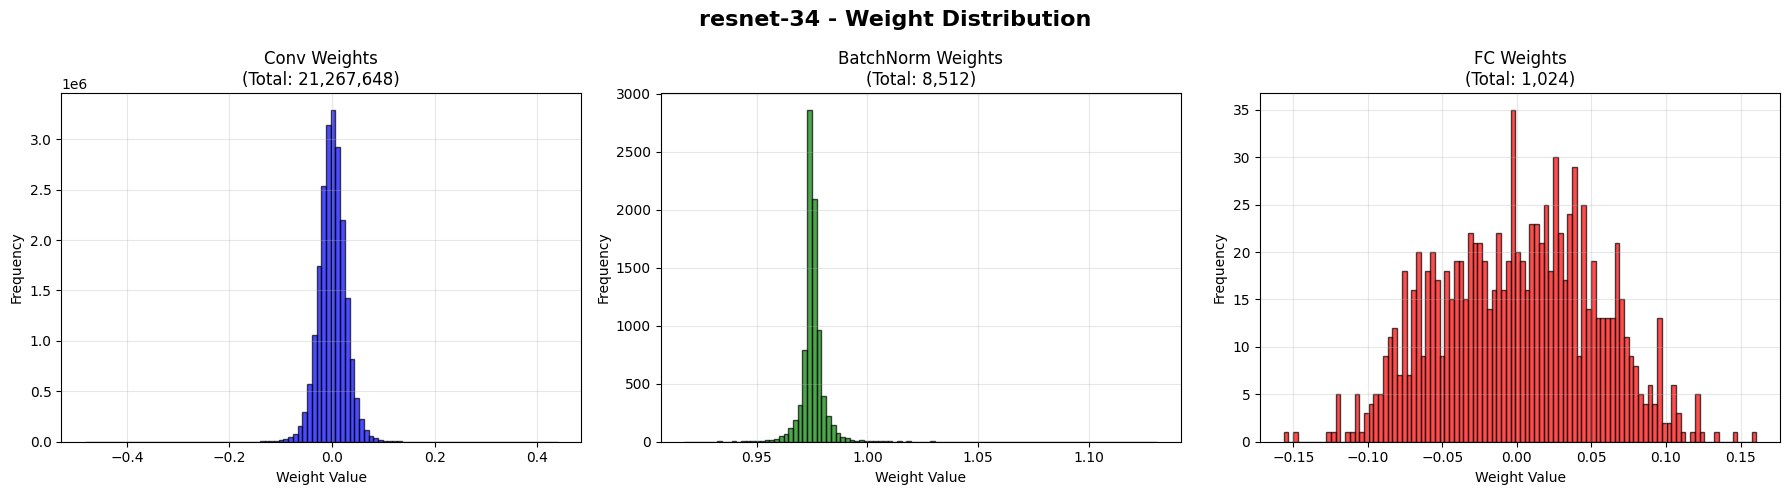

Saved: PlainNet-34_vs_ResNet-34_weight_comparison.png


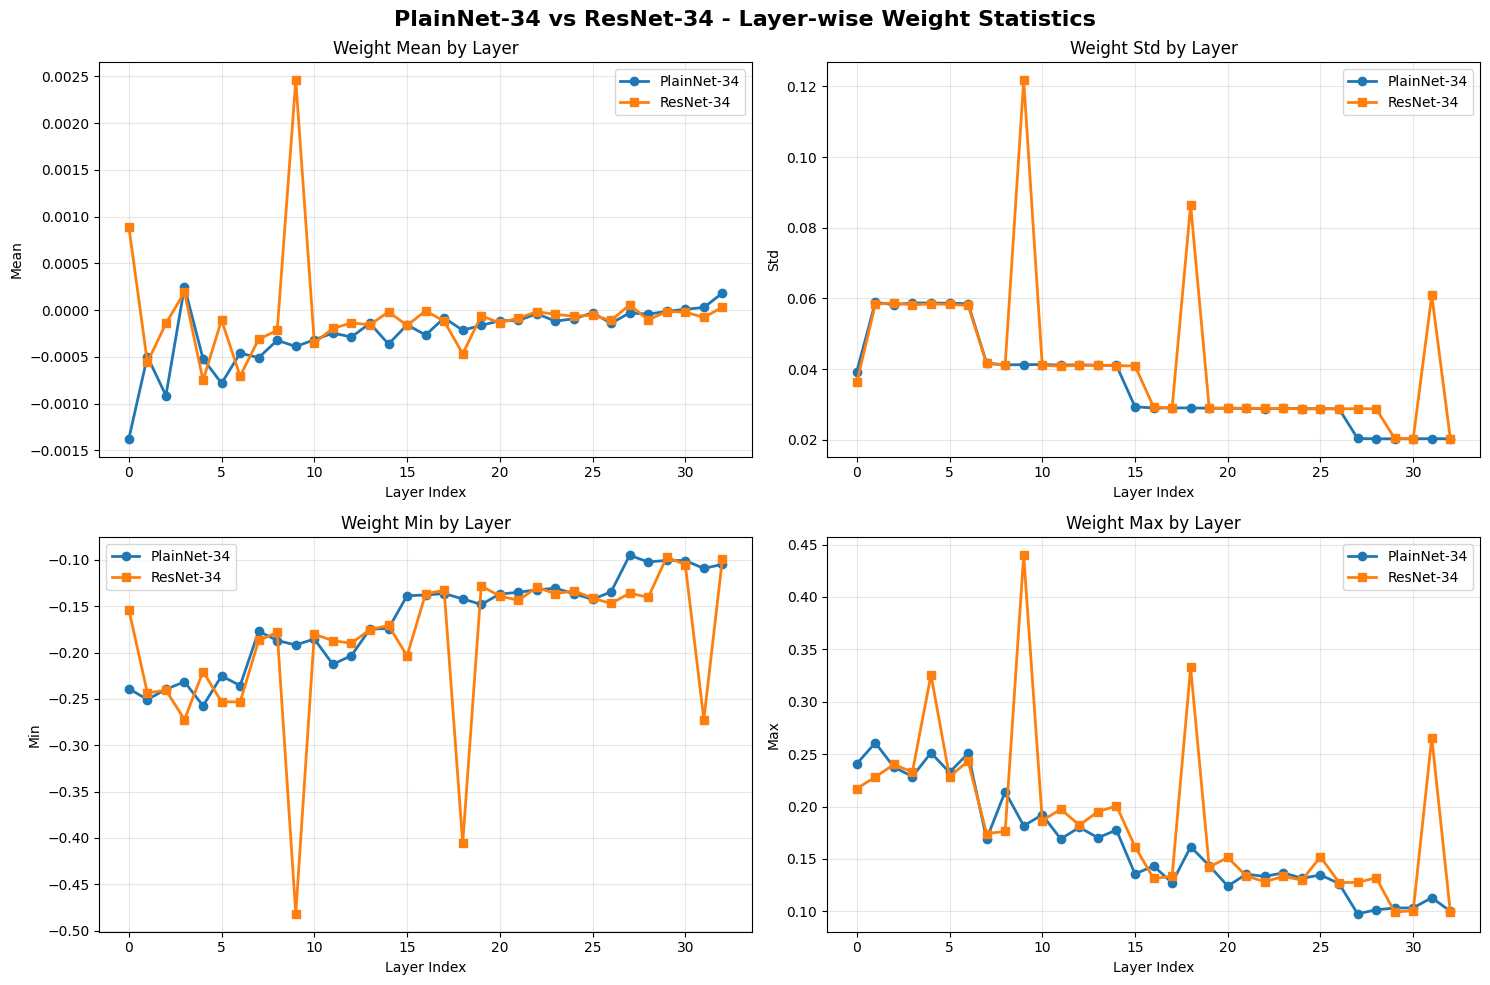

In [ ]:
# PlainNet-34 
plainnet_34 = PlainNet34(num_classes=2)
plainnet_34.load_state_dict(torch.load('plainnet34_catdog.pth'))

# ResNet-50와 비교
resnet_34 = ResNet34(num_classes=2)
resnet_34.load_state_dict(torch.load('resnet34_catdog.pth'))

# 가중치 시각화
visualize_weight_distribution(plainnet_34, 'PlainNet-34')
visualize_weight_distribution(resnet_34, 'resnet-34')


compare_layer_weights(plainnet_34, resnet_34, 'PlainNet-34', 'ResNet-34')


[Analyzing PlainNet-50 parameters...]
  Conv: conv1.0.weight                                     - shape: (64, 3, 7, 7)
  BN:   conv1.1.weight                                     - shape: (64,)
  Conv: feature_extractor.0.0.conv1.weight                 - shape: (64, 64, 1, 1)
  BN:   feature_extractor.0.0.bn1.weight                   - shape: (64,)
  Conv: feature_extractor.0.0.conv2.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.0.bn2.weight                   - shape: (64,)
  Conv: feature_extractor.0.0.conv3.weight                 - shape: (256, 64, 1, 1)
  BN:   feature_extractor.0.0.bn3.weight                   - shape: (256,)
  Conv: feature_extractor.0.1.conv1.weight                 - shape: (64, 256, 1, 1)
  BN:   feature_extractor.0.1.bn1.weight                   - shape: (64,)
  Conv: feature_extractor.0.1.conv2.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.1.bn2.weight                   - shape: (64,)
  Conv: feature_e

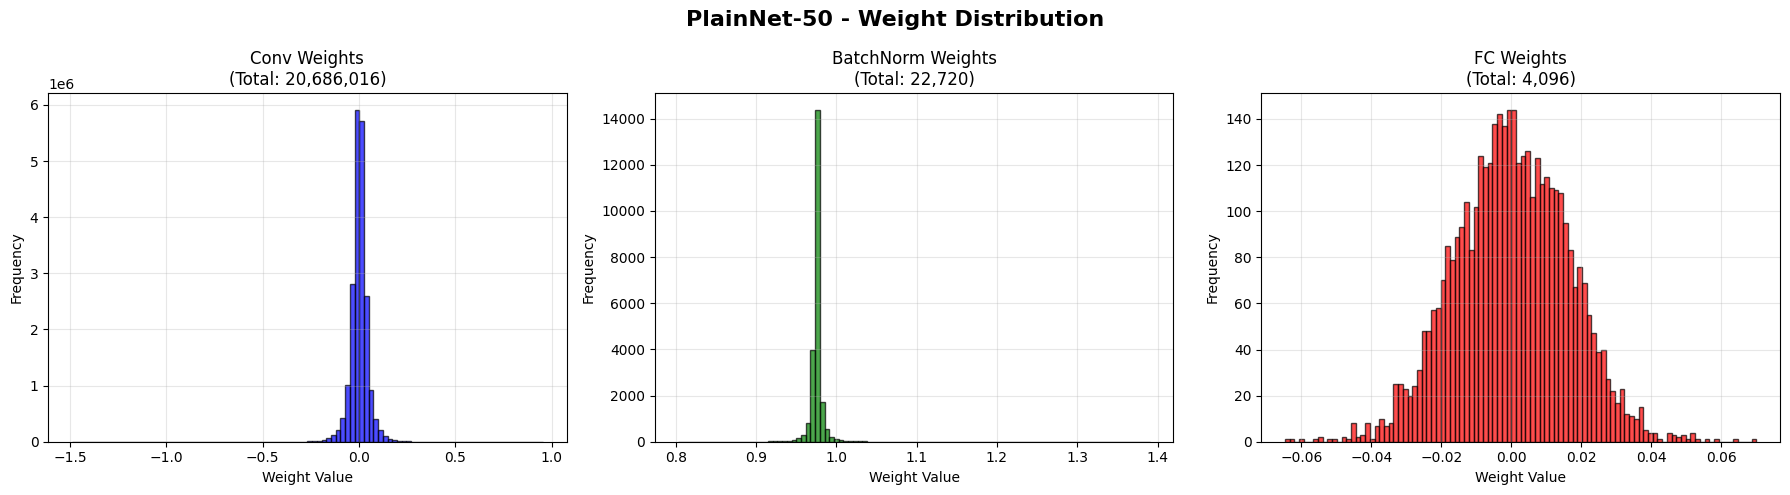


[Analyzing resnet-50 parameters...]
  Conv: conv1.0.weight                                     - shape: (64, 3, 7, 7)
  BN:   conv1.1.weight                                     - shape: (64,)
  Conv: feature_extractor.0.0.conv1.weight                 - shape: (64, 64, 1, 1)
  BN:   feature_extractor.0.0.bn1.weight                   - shape: (64,)
  Conv: feature_extractor.0.0.conv2.weight                 - shape: (64, 64, 3, 3)
  BN:   feature_extractor.0.0.bn2.weight                   - shape: (64,)
  Conv: feature_extractor.0.0.conv3.weight                 - shape: (256, 64, 1, 1)
  BN:   feature_extractor.0.0.bn3.weight                   - shape: (256,)
  Conv: feature_extractor.0.0.shortcut.0.weight            - shape: (256, 64, 1, 1)
  BN:   feature_extractor.0.0.shortcut.1.weight            - shape: (256,)
  Conv: feature_extractor.0.1.conv1.weight                 - shape: (64, 256, 1, 1)
  BN:   feature_extractor.0.1.bn1.weight                   - shape: (64,)
  Conv: feature_e

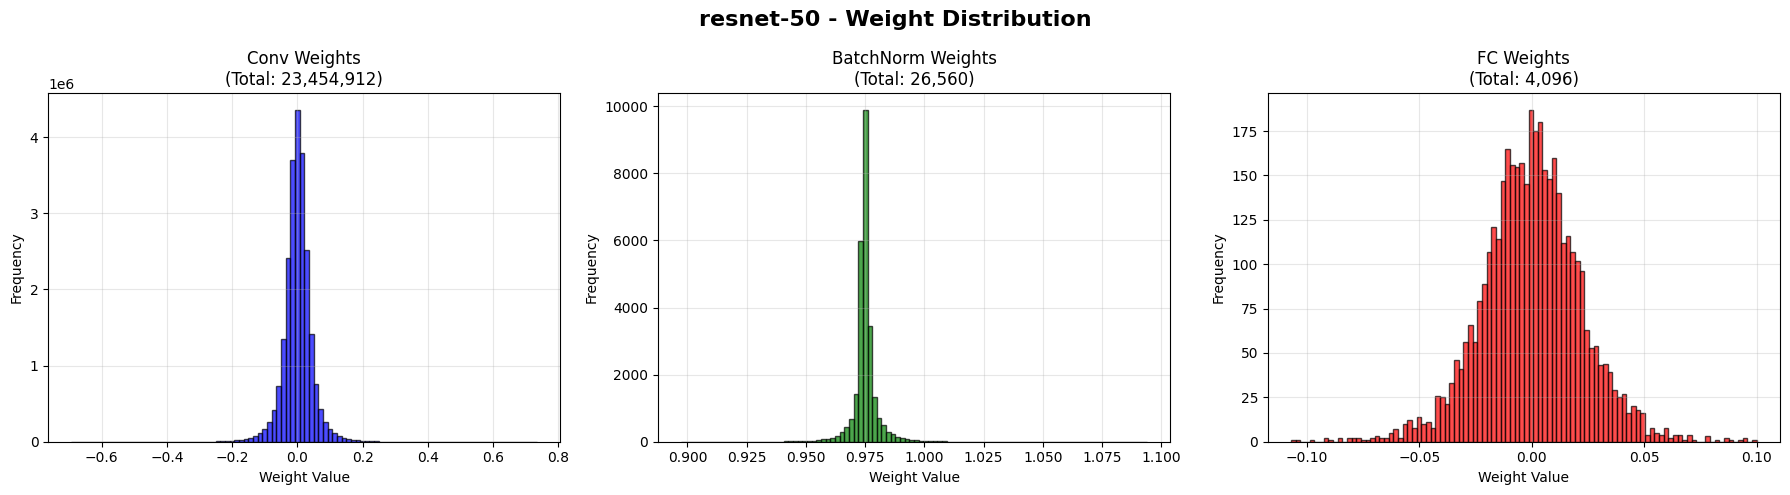

Saved: PlainNet-50_vs_ResNet-50_weight_comparison.png


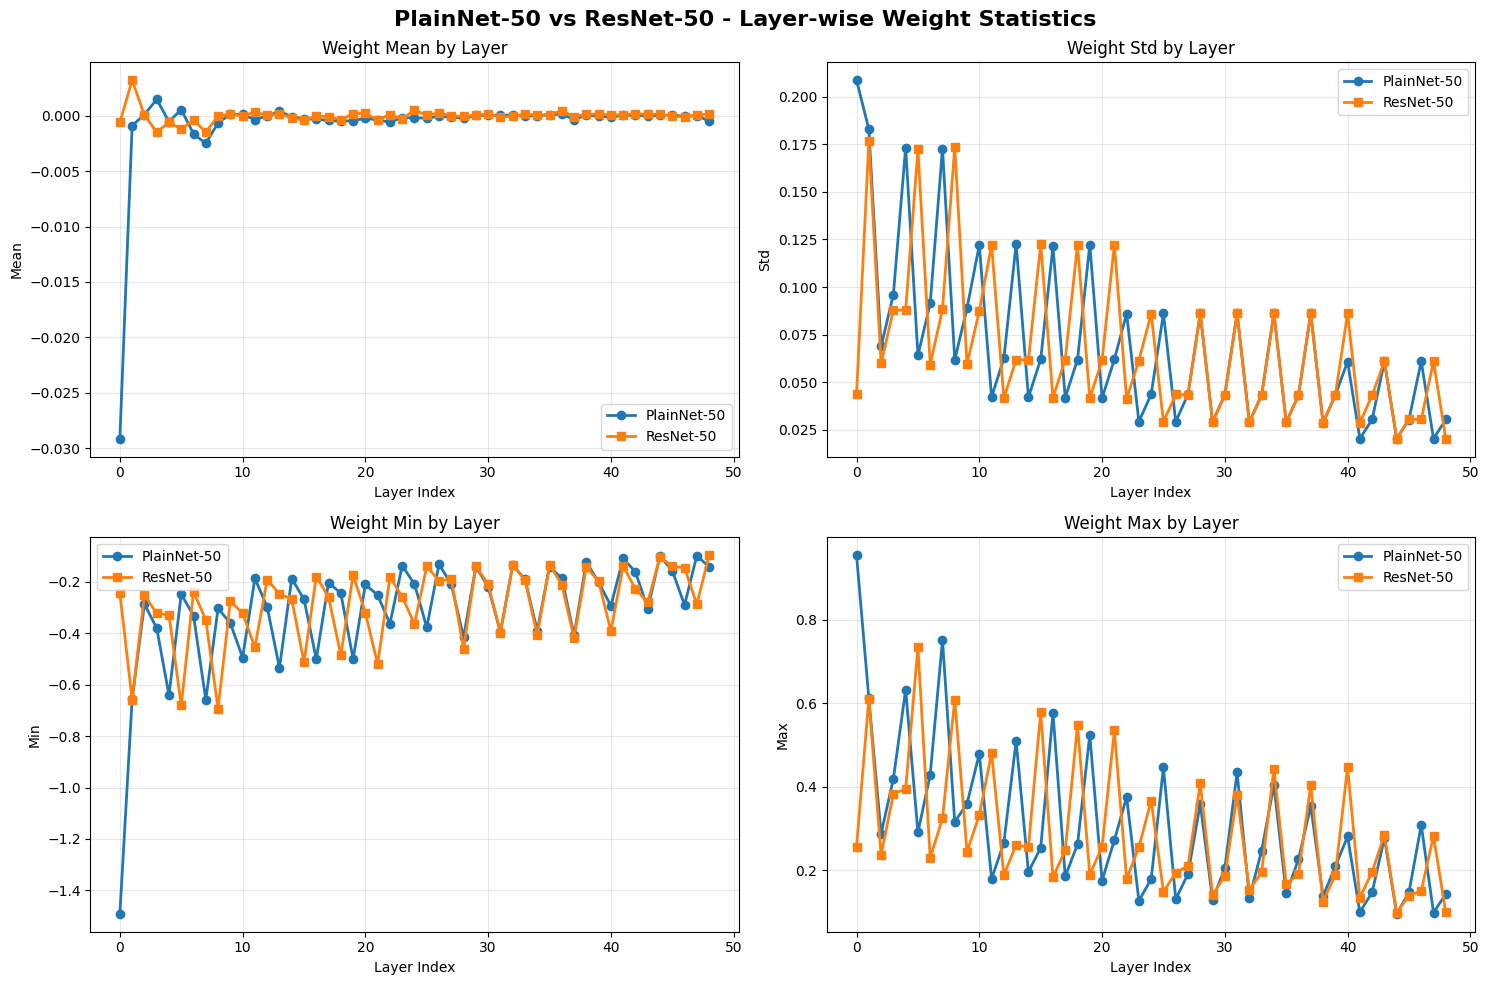

In [ ]:
# PlainNet-50 
plainnet_50 = PlainNet50(num_classes=2)
plainnet_50.load_state_dict(torch.load('plainnet50_catdog.pth'))

# ResNet-50와 비교
resnet_50 = ResNet50(num_classes=2)
resnet_50.load_state_dict(torch.load('resnet50_catdog.pth'))

# 가중치 시각화
visualize_weight_distribution(plainnet_50, 'PlainNet-50')
visualize_weight_distribution(resnet_50, 'resnet-50')




compare_layer_weights(plainnet_50, resnet_50, 'PlainNet-50', 'ResNet-50')

### Unseem data에 대한 error rate

**The Oxford-IIIT Pet Dataset에서 강아지, 고양이만 남기고 제거**

https://www.robots.ox.ac.uk/~vgg/data/pets/

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm
from PIL import Image


# from plainnet34 import PlainNet34
# from resnet34 import ResNet34
# from plainnet50 import PlainNet50
# from resnet50 import ResNet50


class OxfordPetBinaryDataset(Dataset):
    """
    torchvision.datasets.OxfordIIITPet 을 감싸서
    Dog(0) / Cat(1) 이진 라벨로 변환하는 Dataset
    """
    def __init__(self, root, split='test', transform=None):
        self.transform = transform

        # torchvision Oxford-IIIT Pet dataset
        # 이미 다운로드 download=False
        self.base = datasets.OxfordIIITPet(
            root=root,
            split=split,
            target_types="binary-category",
            download=False
        )

        # dog breed 리스트 (소문자)
        dog_breeds = [
            'american_bulldog', 'american_pit_bull_terrier', 'basset_hound',
            'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel',
            'english_setter', 'german_shorthaired', 'great_pyrenees',
            'havanese', 'japanese_chin', 'keeshond', 'leonberger',
            'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug',
            'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu',
            'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier'
        ]
        dog_breeds = [b.lower() for b in dog_breeds]

        # 클래스 id → binary label 매핑 (이미지 열지 않고 클래스 이름만 사용)
        self.class_to_binary = {}
        for cls_idx, cls_name in enumerate(self.base.classes):
            name = cls_name.lower()
            is_dog = any(b in name for b in dog_breeds)
            self.class_to_binary[cls_idx] = 0 if is_dog else 1  # 0: dog, 1: cat

        # 전체 샘플에 대한 binary label 리스트 생성
        # self.base._labels: 각 샘플의 class index
        self.binary_labels = [
            self.class_to_binary[int(cls_idx)]
            for cls_idx in self.base._labels
        ]

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        img, binary_label = self.base[idx]   # binary_label: 0(dog) or 1(cat), 공식 제공
        if self.transform is not None:
            img = self.transform(img)
        return img, binary_label



def load_oxford_pet_binary(data_path, batch_size=32, image_size=224):
    """
    Oxford-IIIT Pet Dataset을 개/고양이 이진 분류로 로드
    """
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    test_dataset = OxfordPetBinaryDataset(
        root=data_path,
        split='test',
        transform=transform
    )

    # Windows + Jupyter 환경에서 안전하게 num_workers=0
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=False
    )

    dog_count = sum(1 for y in test_dataset.binary_labels if y == 0)
    cat_count = len(test_dataset) - dog_count

    print(f"\nTest dataset statistics:")
    print(f"  Total samples: {len(test_dataset)}")
    print(f"  Dogs (class 0): {dog_count}")
    print(f"  Cats (class 1): {cat_count}")

    return test_loader, dog_count, cat_count


def load_model(model_class, model_path, device):
    """
    저장된 모델 가중치 로드 (이진 분류)
    model_class: 위에서 정의한 PlainNet34 / ResNet34 / PlainNet50 / ResNet50 클래스
    """
    # 아래 생성자는 구현한 시그니처에 맞게 조정
    model = model_class()


    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()

    print(f"Loaded model from: {model_path}")
    return model


def calculate_binary_error_rate(model, test_loader, device):
    """
    이진 분류 Error rate 계산
    """
    model.eval()

    # [[TN, FP],
    #  [FN, TP]]
    confusion = np.zeros((2, 2), dtype=int)

    all_predictions = []
    all_labels = []

    print("\n" + "=" * 60)
    print("Evaluating on test set...")
    print("=" * 60)

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            for true, pred in zip(labels.cpu().numpy(), predicted.cpu().numpy()):
                confusion[true][pred] += 1

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    total = confusion.sum()
    correct = confusion[0][0] + confusion[1][1]
    errors = total - correct
    accuracy = 100 * correct / total
    error_rate = 100 - accuracy

    per_class_stats = {
        'Dog (Class 0)': {
            'total': confusion[0].sum(),
            'correct': confusion[0][0],
            'errors': confusion[0][1],
            'accuracy': 100 * confusion[0][0] / confusion[0].sum() if confusion[0].sum() > 0 else 0,
            'error_rate': 100 * confusion[0][1] / confusion[0].sum() if confusion[0].sum() > 0 else 0
        },
        'Cat (Class 1)': {
            'total': confusion[1].sum(),
            'correct': confusion[1][1],
            'errors': confusion[1][0],
            'accuracy': 100 * confusion[1][1] / confusion[1].sum() if confusion[1].sum() > 0 else 0,
            'error_rate': 100 * confusion[1][0] / confusion[1].sum() if confusion[1].sum() > 0 else 0
        }
    }

    return error_rate, accuracy, confusion, per_class_stats, all_predictions, all_labels


def print_confusion_matrix(confusion, model_name):
    print(f"\n{model_name} - Confusion Matrix:")
    print("-" * 40)
    print("              Predicted")
    print("              Dog    Cat")
    print(f"Actual Dog   {confusion[0][0]:5d}  {confusion[0][1]:5d}")
    print(f"       Cat   {confusion[1][0]:5d}  {confusion[1][1]:5d}")
    print("-" * 40)

    TP = confusion[1][1]
    TN = confusion[0][0]
    FP = confusion[0][1]
    FN = confusion[1][0]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nAdditional Metrics (for Cat class):")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1_score:.4f}")



if __name__ == "__main__":
    DATA_PATH = "archive"          
    BATCH_SIZE = 32
    IMAGE_SIZE = 224

    # 평가할 모델들 설정 
    models_to_evaluate = [
        {
            'name': 'PlainNet-34',
            'class': PlainNet34,
            'path': 'plainnet34_catdog.pth'
        },
        {
            'name': 'ResNet-34',
            'class': ResNet34,
            'path': 'resnet34_catdog.pth'
        },
        {
            'name': 'PlainNet-50',
            'class': PlainNet50,
            'path': 'plainnet50_catdog.pth'
        },
        {
            'name': 'ResNet-50',
            'class': ResNet50,
            'path': 'resnet50_catdog.pth'
        }
    ]

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 테스트 데이터 로드
    test_loader, dog_count, cat_count = load_oxford_pet_binary(
        DATA_PATH,
        batch_size=BATCH_SIZE,
        image_size=IMAGE_SIZE
    )

    results = {}

    # 각 모델 평가
    for model_config in models_to_evaluate:
        model_name = model_config['name']

        if not os.path.exists(model_config['path']):
            print(f"\n[WARNING] {model_config['path']} not found. Skipping {model_name}...")
            continue

        print("\n" + "=" * 60)
        print(f"Evaluating {model_name}")
        print("=" * 60)

        model = load_model(
            model_config['class'],
            model_config['path'],
            device
        )

        error_rate, accuracy, confusion, per_class_stats, predictions, labels = \
            calculate_binary_error_rate(model, test_loader, device)

        results[model_name] = {
            'error_rate': error_rate,
            'accuracy': accuracy,
            'confusion_matrix': confusion,
            'per_class_stats': per_class_stats
        }

        print("\n" + "-" * 60)
        print(f"{model_name} Results:")
        print("-" * 60)
        print(f"Overall Accuracy:    {accuracy:.2f}%")
        print(f"Overall Error Rate:  {error_rate:.2f}%")

        print(f"\nPer-Class Performance:")
        for class_name, stats in per_class_stats.items():
            print(f"\n  {class_name}:")
            print(f"    Total:      {stats['total']}")
            print(f"    Correct:    {stats['correct']}")
            print(f"    Errors:     {stats['errors']}")
            print(f"    Accuracy:   {stats['accuracy']:.2f}%")
            print(f"    Error Rate: {stats['error_rate']:.2f}%")

        print_confusion_matrix(confusion, model_name)
        print("-" * 60)

    # 최종 비교 출력
    print("\n" + "=" * 60)
    print("FINAL COMPARISON - Binary Classification Error Rates")
    print("=" * 60)
    print(f"{'Model':<15} {'Error Rate':<12} {'Accuracy':<12} {'Dog Acc':<12} {'Cat Acc':<12}")
    print("-" * 60)

    for model_name, result in results.items():
        dog_acc = result['per_class_stats']['Dog (Class 0)']['accuracy']
        cat_acc = result['per_class_stats']['Cat (Class 1)']['accuracy']
        print(f"{model_name:<15} {result['error_rate']:>6.2f}%      "
              f"{result['accuracy']:>6.2f}%      "
              f"{dog_acc:>6.2f}%      "
              f"{cat_acc:>6.2f}%")

    print("=" * 60)

    # CSV 저장 (선택)
    try:
        import pandas as pd

        df_overall = pd.DataFrame({
            model_name: {
                'Error_Rate': result['error_rate'],
                'Accuracy': result['accuracy'],
                'Dog_Accuracy': result['per_class_stats']['Dog (Class 0)']['accuracy'],
                'Cat_Accuracy': result['per_class_stats']['Cat (Class 1)']['accuracy']
            }
            for model_name, result in results.items()
        }).T

        df_overall.to_csv('binary_error_rate_results.csv')
        print("\nResults saved to 'binary_error_rate_results.csv'")
    except ImportError:
        print("\npandas not installed. Skipping CSV export.")


Using device: cuda

Test dataset statistics:
  Total samples: 3669
  Dogs (class 0): 998
  Cats (class 1): 2671

Evaluating PlainNet-34
Loaded model from: plainnet34_catdog.pth

Evaluating on test set...


Testing: 100%|██████████| 115/115 [00:09<00:00, 12.34it/s]



------------------------------------------------------------
PlainNet-34 Results:
------------------------------------------------------------
Overall Accuracy:    85.83%
Overall Error Rate:  14.17%

Per-Class Performance:

  Dog (Class 0):
    Total:      1183
    Correct:    925
    Errors:     258
    Accuracy:   78.19%
    Error Rate: 21.81%

  Cat (Class 1):
    Total:      2486
    Correct:    2224
    Errors:     262
    Accuracy:   89.46%
    Error Rate: 10.54%

PlainNet-34 - Confusion Matrix:
----------------------------------------
              Predicted
              Dog    Cat
Actual Dog     925    258
       Cat     262   2224
----------------------------------------

Additional Metrics (for Cat class):
  Precision: 0.8961
  Recall:    0.8946
  F1-Score:  0.8953
------------------------------------------------------------

Evaluating ResNet-34
Loaded model from: resnet34_catdog.pth

Evaluating on test set...


Testing: 100%|██████████| 115/115 [00:09<00:00, 12.64it/s]



------------------------------------------------------------
ResNet-34 Results:
------------------------------------------------------------
Overall Accuracy:    75.44%
Overall Error Rate:  24.56%

Per-Class Performance:

  Dog (Class 0):
    Total:      1183
    Correct:    1011
    Errors:     172
    Accuracy:   85.46%
    Error Rate: 14.54%

  Cat (Class 1):
    Total:      2486
    Correct:    1757
    Errors:     729
    Accuracy:   70.68%
    Error Rate: 29.32%

ResNet-34 - Confusion Matrix:
----------------------------------------
              Predicted
              Dog    Cat
Actual Dog    1011    172
       Cat     729   1757
----------------------------------------

Additional Metrics (for Cat class):
  Precision: 0.9108
  Recall:    0.7068
  F1-Score:  0.7959
------------------------------------------------------------

Evaluating PlainNet-50
Loaded model from: plainnet50_catdog.pth

Evaluating on test set...


Testing: 100%|██████████| 115/115 [00:09<00:00, 11.84it/s]



------------------------------------------------------------
PlainNet-50 Results:
------------------------------------------------------------
Overall Accuracy:    75.72%
Overall Error Rate:  24.28%

Per-Class Performance:

  Dog (Class 0):
    Total:      1183
    Correct:    797
    Errors:     386
    Accuracy:   67.37%
    Error Rate: 32.63%

  Cat (Class 1):
    Total:      2486
    Correct:    1981
    Errors:     505
    Accuracy:   79.69%
    Error Rate: 20.31%

PlainNet-50 - Confusion Matrix:
----------------------------------------
              Predicted
              Dog    Cat
Actual Dog     797    386
       Cat     505   1981
----------------------------------------

Additional Metrics (for Cat class):
  Precision: 0.8369
  Recall:    0.7969
  F1-Score:  0.8164
------------------------------------------------------------

Evaluating ResNet-50
Loaded model from: resnet50_catdog.pth

Evaluating on test set...


Testing: 100%|██████████| 115/115 [00:09<00:00, 11.83it/s]


------------------------------------------------------------
ResNet-50 Results:
------------------------------------------------------------
Overall Accuracy:    77.68%
Overall Error Rate:  22.32%

Per-Class Performance:

  Dog (Class 0):
    Total:      1183
    Correct:    900
    Errors:     283
    Accuracy:   76.08%
    Error Rate: 23.92%

  Cat (Class 1):
    Total:      2486
    Correct:    1950
    Errors:     536
    Accuracy:   78.44%
    Error Rate: 21.56%

ResNet-50 - Confusion Matrix:
----------------------------------------
              Predicted
              Dog    Cat
Actual Dog     900    283
       Cat     536   1950
----------------------------------------

Additional Metrics (for Cat class):
  Precision: 0.8733
  Recall:    0.7844
  F1-Score:  0.8264
------------------------------------------------------------

FINAL COMPARISON - Binary Classification Error Rates
Model           Error Rate   Accuracy     Dog Acc      Cat Acc     
---------------------------------